# 01-basic-needs

_Arvid Lundervold, 2025-02-25_ (with [Claude](https://www.anthropic.com/claude?utm_source=chatgpt.com) 3.7 Sonnet and [Cursor](https://www.cursor.com) IDE --  beginning-to-end in 5 hours!)


Tutorial [[pdf](https://github.com/arvidl/salmon-digital-twins/blob/main/papers/DigitalTwin_20250225.pdf)] (including an Annotated Reference Guide) with Python code based on the paper:<br> J. Giske et al. _Premises for digital twins reporting on Atlantic salmon wellbeing_. <br>Behavioural Processes 2025;226:105163 [[link](https://www.sciencedirect.com/science/article/pii/S0376635725000257)] Open access: CC BY 4.0 License



Based on Figures 1 and 2 from the paper, we implement the basic needs of Atlantic salmon

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import networkx as nx
from IPython.display import display, clear_output

# Configure visualization
plt.style.use('seaborn-v0_8-whitegrid')  # Updated to use the v0_8 prefix
# Alternative: use seaborn's set_style directly
# sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

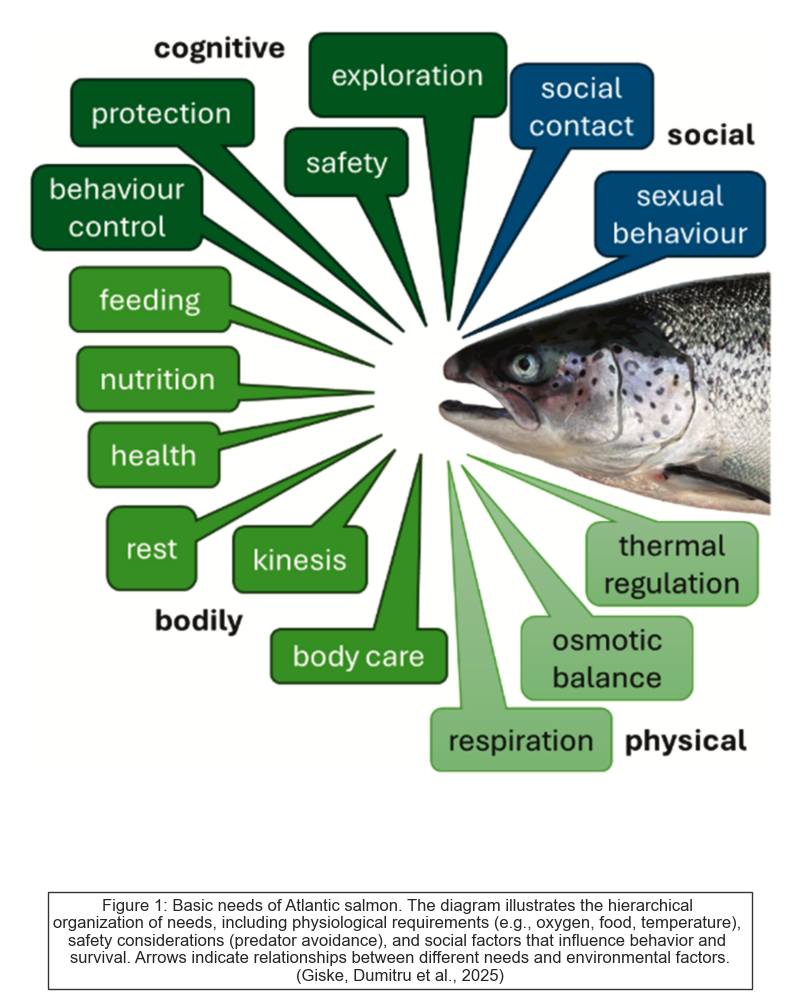

In [5]:
# Import Figure 1 from the paper
from IPython.display import Image, display
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib import rcParams
import os


# Check if running in Google Colab
def is_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False

# Load and display the image based on environment
if is_colab():
    # Colab environment - download from URL
    import requests
    from PIL import Image
    from io import BytesIO
    
    # URL to the image on GitHub or other hosting
    image_url = "https://raw.githubusercontent.com/arvidl/salmon-digital-twins/main/assets/Giske_Fig_1.png"
    
    # Download the image
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
else:
    # Local environment - use local file
    fig1_path = "../assets/Giske_Fig_1.png"
    img = plt.imread(fig1_path)


# Create figure with image and caption
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')

# Add detailed caption as a figure title
caption = """Figure 1: Basic needs of Atlantic salmon. The diagram illustrates the hierarchical 
organization of needs, including physiological requirements (e.g., oxygen, food, temperature), 
safety considerations (predator avoidance), and social factors that influence behavior and 
survival. Arrows indicate relationships between different needs and environmental factors.
(Giske, Dumitru et al., 2025)"""

plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', 
            fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Make room for the caption
plt.show()

## 2. Basic Building Blocks

### 2.1 Basic Needs Representation

In [6]:
class BasicNeeds:
    """Representation of basic needs categories for salmon wellbeing"""
    
    def __init__(self):
        # Cognitive needs
        self.exploration = 0.0
        self.protection = 0.0
        self.safety = 0.0
        
        # Social needs
        self.social_contact = 0.0
        self.sexual_behavior = 0.0
        
        # Bodily needs
        self.feeding = 0.0
        self.nutrition = 0.0
        self.health = 0.0
        self.rest = 0.0
        self.kinesis = 0.0
        self.body_care = 0.0
        
        # Physical needs
        self.thermal_regulation = 0.0
        self.osmotic_balance = 0.0
        self.respiration = 0.0
        
        # Behavior control need
        self.behavior_control = 0.0
        
    def get_all_needs(self):
        """Return all needs as a dictionary"""
        return {
            "exploration": self.exploration,
            "protection": self.protection,
            "safety": self.safety,
            "social_contact": self.social_contact,
            "sexual_behavior": self.sexual_behavior,
            "feeding": self.feeding,
            "nutrition": self.nutrition,
            "health": self.health,
            "rest": self.rest,
            "kinesis": self.kinesis,
            "body_care": self.body_care,
            "thermal_regulation": self.thermal_regulation,
            "osmotic_balance": self.osmotic_balance,
            "respiration": self.respiration,
            "behavior_control": self.behavior_control
        }
        
    def get_most_urgent_need(self):
        """Return the most urgent need (highest value)"""
        needs = self.get_all_needs()
        return max(needs.items(), key=lambda x: x[1])

### BasicNeeds Class Explanation

This cell defines a Python class called `BasicNeeds` that represents the various needs of Atlantic salmon in a structured way. The class is designed to model the hierarchical organization of needs as shown in Figure 1 from the Giske, Dumitru et al. (2025) paper.

#### Structure and Components:

1. **Class Initialization**: The `__init__` method initializes all needs with a default value of 0.0, organized into five categories:
   - **Cognitive needs**: exploration, protection, safety
   - **Social needs**: social contact, sexual behavior
   - **Bodily needs**: feeding, nutrition, health, rest, kinesis, body care
   - **Physical needs**: thermal regulation, osmotic balance, respiration
   - **Behavior control need**: behavior control

2. **Methods**:
   - `get_all_needs()`: Returns a dictionary containing all needs and their current values, making it easy to access the complete state of the salmon's needs.
   - `get_most_urgent_need()`: Identifies and returns the need with the highest value, which represents the most pressing requirement for the salmon at a given moment.

#### Purpose:

This class serves as a fundamental data structure for modeling salmon behavior based on their needs. The values of these needs would typically change based on environmental conditions, the salmon's internal state, and other factors. By tracking these values, a simulation can determine which needs are most urgent and model how the salmon might behave to address those needs.

The structure directly reflects the hierarchical organization of needs shown in Figure 1, providing a computational representation of the conceptual model described in the paper.


_Let's test our basic needs implementation:_

In [7]:
# Create basic needs instance
needs = BasicNeeds()

# Set some random values
needs.feeding = 0.8
needs.safety = 0.6
needs.exploration = 0.4
needs.respiration = 0.2

# Check the most urgent need
most_urgent = needs.get_most_urgent_need()
print(f"Most urgent need: {most_urgent[0]} with value {most_urgent[1]}")

Most urgent need: feeding with value 0.8


### 2.2 Neuronal Response Function

The neuronal response function converts metric values (like temperature or oxygen levels) into subjective values in the salmon's brain:

In [8]:
class NeuronalResponse:
    """
    Converts metric input values to subjective values in the salmon brain
    using a non-linear function (sigmoid by default)
    """
    
    def __init__(self, threshold, sensitivity):
        """
        Args:
            threshold: The inflection point of the sigmoid function
            sensitivity: The steepness of the sigmoid curve
        """
        self.threshold = threshold
        self.sensitivity = sensitivity
    
    def activate(self, input_value):
        """Convert metric input to subjective value"""
        return 1 / (1 + np.exp(-self.sensitivity * (input_value - self.threshold)))
        
    def __call__(self, input_value):
        """Allow direct calling of the object as a function"""
        return self.activate(input_value)

### NeuronalResponse Class Explanation

This code defines a `NeuronalResponse` class that models how salmon convert external environmental measurements (like temperature or oxygen levels) into internal subjective values in their brain.

#### Key Components:

1. **Purpose**: This class implements a non-linear transformation function (specifically a sigmoid function) that converts objective metric values from the environment into subjective neural responses.

2. **Parameters**:
   - `threshold`: The inflection point of the sigmoid curve. This represents the value at which the response is 0.5 (halfway between minimum and maximum).
   - `sensitivity`: Controls the steepness of the sigmoid curve. Higher values make the transition from low to high response more abrupt.

3. **Methods**:
   - `activate(input_value)`: Applies the sigmoid function to transform the input value.
   - `__call__(input_value)`: Makes the object callable directly, so you can use it like `response_function(value)` instead of `response_function.activate(value)`.

4. **Mathematical Function**: The sigmoid function used is:
$$
   f(x) = \frac{1}{1 + e^{-\text{sensitivity} \cdot (x - \text{threshold})}}
$$
   This produces an S-shaped curve that maps any input to a value between 0 and 1.

#### Biological Significance:

This models how a salmon's nervous system might respond to environmental stimuli. For example:
- A temperature of 15°C might be optimal (producing a high response)
- Temperatures much higher or lower would produce diminishing responses
- The threshold might represent the preferred temperature
- The sensitivity would determine how quickly the fish becomes uncomfortable as temperature deviates from optimal

This transformation is crucial for modeling how objective environmental conditions translate into subjective experiences that drive the salmon's behavior.


_Let's visualize how the neuronal response function works:_

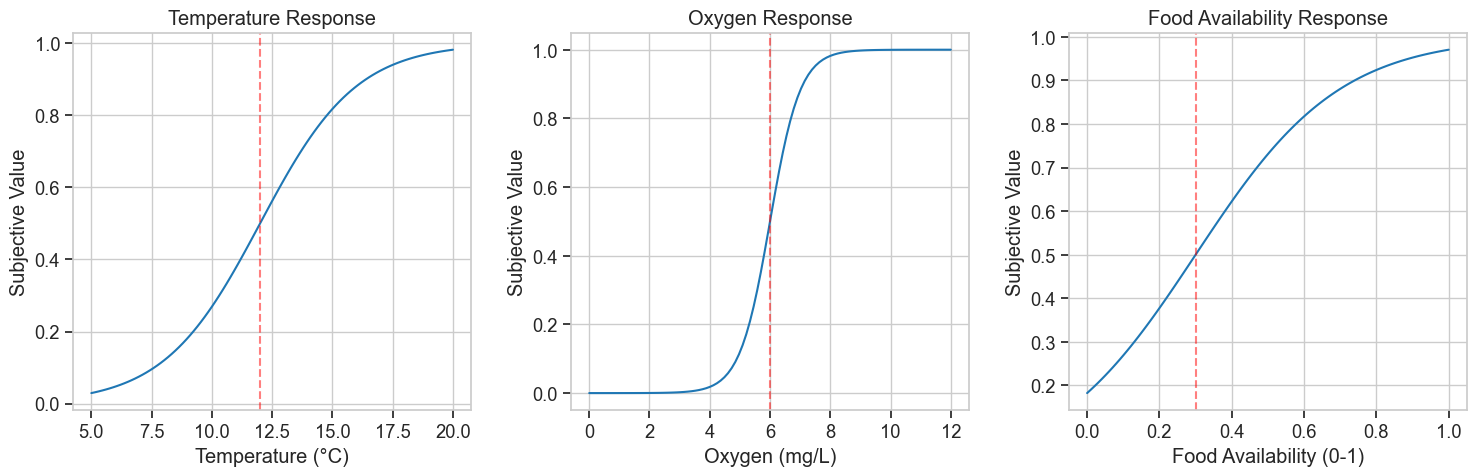

In [9]:
# Create neuronal responses with different parameters
temp_response = NeuronalResponse(threshold=12, sensitivity=0.5)  # Temperature (°C)
oxygen_response = NeuronalResponse(threshold=6, sensitivity=2.0)  # Oxygen (mg/L)
food_response = NeuronalResponse(threshold=0.3, sensitivity=5.0)  # Food availability (0-1)

# Create test input ranges
temp_range = np.linspace(5, 20, 100)
oxygen_range = np.linspace(0, 12, 100)
food_range = np.linspace(0, 1, 100)

# Calculate responses
temp_values = [temp_response(t) for t in temp_range]
oxygen_values = [oxygen_response(o) for o in oxygen_range]
food_values = [food_response(f) for f in food_range]

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(temp_range, temp_values)
axes[0].set_title('Temperature Response')
axes[0].set_xlabel('Temperature (°C)')
axes[0].set_ylabel('Subjective Value')
axes[0].axvline(x=12, color='r', linestyle='--', alpha=0.5)

axes[1].plot(oxygen_range, oxygen_values)
axes[1].set_title('Oxygen Response')
axes[1].set_xlabel('Oxygen (mg/L)')
axes[1].set_ylabel('Subjective Value')
axes[1].axvline(x=6, color='r', linestyle='--', alpha=0.5)

axes[2].plot(food_range, food_values)
axes[2].set_title('Food Availability Response')
axes[2].set_xlabel('Food Availability (0-1)')
axes[2].set_ylabel('Subjective Value')
axes[2].axvline(x=0.3, color='r', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Neuronal Response Function Visualization

These three graphs illustrate how the `NeuronalResponse` class transforms environmental inputs into subjective values for Atlantic salmon across three different parameters:

#### Temperature Response (Left)
- **X-axis**: Temperature in degrees Celsius (5°C to 20°C)
- **Y-axis**: Subjective value (0 to 1)
- **Red dashed line**: Threshold at 12.5°C
- **Curve characteristics**: A sigmoid curve with moderate sensitivity (gradual slope)
- **Interpretation**: Temperatures below 10°C produce low subjective values, indicating suboptimal conditions. The response increases steadily through the threshold region, with temperatures above 15°C approaching optimal subjective values near 1.0.

#### Oxygen Response (Middle)
- **X-axis**: Oxygen concentration in mg/L (0 to 12 mg/L)
- **Y-axis**: Subjective value (0 to 1)
- **Red dashed line**: Threshold at 6 mg/L
- **Curve characteristics**: A steep sigmoid curve with high sensitivity (sharp transition)
- **Interpretation**: Oxygen levels below 4 mg/L produce almost no response, indicating potentially dangerous conditions. There's a very rapid transition around the 6 mg/L threshold, with levels above 8 mg/L reaching maximum subjective value, suggesting that oxygen requirements have a more critical threshold than temperature.

#### Food Availability Response (Right)
- **X-axis**: Food availability on a scale from 0 to 1
- **Y-axis**: Subjective value (0 to 1)
- **Red dashed line**: Threshold at 0.3
- **Curve characteristics**: A more linear-appearing sigmoid with moderate sensitivity
- **Interpretation**: The response increases steadily with food availability, with the threshold at 0.3 marking the point where the subjective value is 0.5. Even low food availability produces some response, and the curve continues to rise even at high availability levels.

These visualizations demonstrate how different environmental parameters can be processed by the salmon's neuronal systems with varying sensitivities and thresholds, reflecting the biological importance and response characteristics for each parameter.


### 2.3 Sensor Implementation

Sensors process environmental inputs:

In [10]:
class Sensor:
    """
    Base class for sensors that detect environmental conditions
    """
    
    def __init__(self, name, neuronal_response):
        self.name = name
        self.neuronal_response = neuronal_response
        self.last_value = None
        self.last_processed = None
        
    def sense(self, environment_value):
        """
        Sense a value from the environment and process it
        through the neuronal response function
        """
        self.last_value = environment_value
        self.last_processed = self.neuronal_response(environment_value)
        return self.last_processed

### Sensor Class Explanation

This code defines a `Sensor` class that serves as a base class for modeling how salmon detect and process environmental conditions.

#### Key Components:

1. **Purpose**: The `Sensor` class creates a framework for detecting environmental inputs and transforming them into subjective values using a neuronal response function.

2. **Initialization Parameters**:
   - `name`: A string identifier for the sensor (e.g., "temperature", "oxygen")
   - `neuronal_response`: An instance of the `NeuronalResponse` class that will process the raw environmental values

3. **Instance Variables**:
   - `self.name`: Stores the sensor's name
   - `self.neuronal_response`: Stores the neuronal response function
   - `self.last_value`: Tracks the most recent raw environmental value detected
   - `self.last_processed`: Tracks the most recent processed (subjective) value

4. **Methods**:
   - `sense(environment_value)`: Takes a raw environmental input, processes it through the neuronal response function, stores both raw and processed values, and returns the processed value

#### Biological Significance:

This class models how a salmon's sensory systems work:
- It detects raw environmental data (like water temperature or oxygen levels)
- It processes these inputs through specialized neural pathways (represented by the neuronal response function)
- It produces a subjective value that represents the fish's perception of that environmental condition

In a simulation, different sensor instances would be created for different environmental parameters, each with appropriate neuronal response functions calibrated to the biological sensitivity of salmon to those parameters.


### 2.4 Environment Representation

The environment provides inputs to the digital twin:

In [11]:
class Environment:
    """
    Representation of the aquaculture environment
    """
    
    def __init__(self, 
                 temperature=10, 
                 oxygen_level=8.5,
                 light_intensity=100,
                 food_availability=1.0,
                 social_density=50,
                 noise_level=0.1):
        self.temperature = temperature
        self.oxygen_level = oxygen_level
        self.light_intensity = light_intensity
        self.food_availability = food_availability
        self.social_density = social_density
        self.noise_level = noise_level
        self.time = 0
        
    def get_state(self):
        """Return the current state of the environment"""
        return {
            "temperature": self.temperature,
            "oxygen_level": self.oxygen_level,
            "light_intensity": self.light_intensity,
            "food_availability": self.food_availability,
            "social_density": self.social_density,
            "noise_level": self.noise_level,
            "time": self.time
        }
        
    def step(self, delta_t=1):
        """Advance the environment by time delta_t"""
        self.time += delta_t
        
        # Simulate some environmental fluctuations
        self.temperature += np.random.normal(0, 0.1)
        self.oxygen_level += np.random.normal(0, 0.05)
        self.light_intensity = max(0, self.light_intensity + np.random.normal(0, 5))
        
        # Ensure values stay in reasonable ranges
        self.temperature = np.clip(self.temperature, 5, 20)
        self.oxygen_level = np.clip(self.oxygen_level, 4, 12)

### Environment Class Explanation

This code defines an `Environment` class that simulates the aquaculture environment where salmon live.

#### Key Components:

1. **Purpose**: The `Environment` class creates a representation of the physical conditions that affect salmon in an aquaculture setting.

2. **Initialization Parameters**:
   - `temperature`: Water temperature in degrees Celsius (default: 10°C)
   - `oxygen_level`: Dissolved oxygen in mg/L (default: 8.5 mg/L)
   - `light_intensity`: Light level in arbitrary units (default: 100)
   - `food_availability`: Food availability on a scale of 0-1 (default: 1.0)
   - `social_density`: Number of fish in proximity (default: 50)
   - `noise_level`: Environmental noise on a scale of 0-1 (default: 0.1)

3. **Instance Variables**:
   - All the parameters above are stored as instance variables
   - `self.time`: Tracks the simulation time (initialized to 0)

4. **Methods**:
   - `get_state()`: Returns a dictionary containing all current environmental parameters
   - `step(delta_t=1)`: Advances the simulation by a time step and updates environmental conditions

5. **Environmental Dynamics**:
   - The `step()` method simulates natural fluctuations in environmental conditions:
     - Temperature varies with small random changes (normal distribution with σ=0.1)
     - Oxygen levels fluctuate slightly (normal distribution with σ=0.05)
     - Light intensity changes more dramatically (normal distribution with σ=5)
   - Values are constrained to realistic ranges using `np.clip()`:
     - Temperature: 5-20°C
     - Oxygen: 4-12 mg/L

#### Simulation Significance:

This class provides the dynamic environmental context for the salmon digital twin:
- It maintains the state of multiple environmental variables
- It introduces realistic variability through random fluctuations
- It ensures values remain within biologically plausible ranges
- It provides a time dimension for the simulation

The environment serves as the input source for the salmon's sensors, which then trigger responses based on the fish's needs and preferences.


_Let's test the environment simulation:_

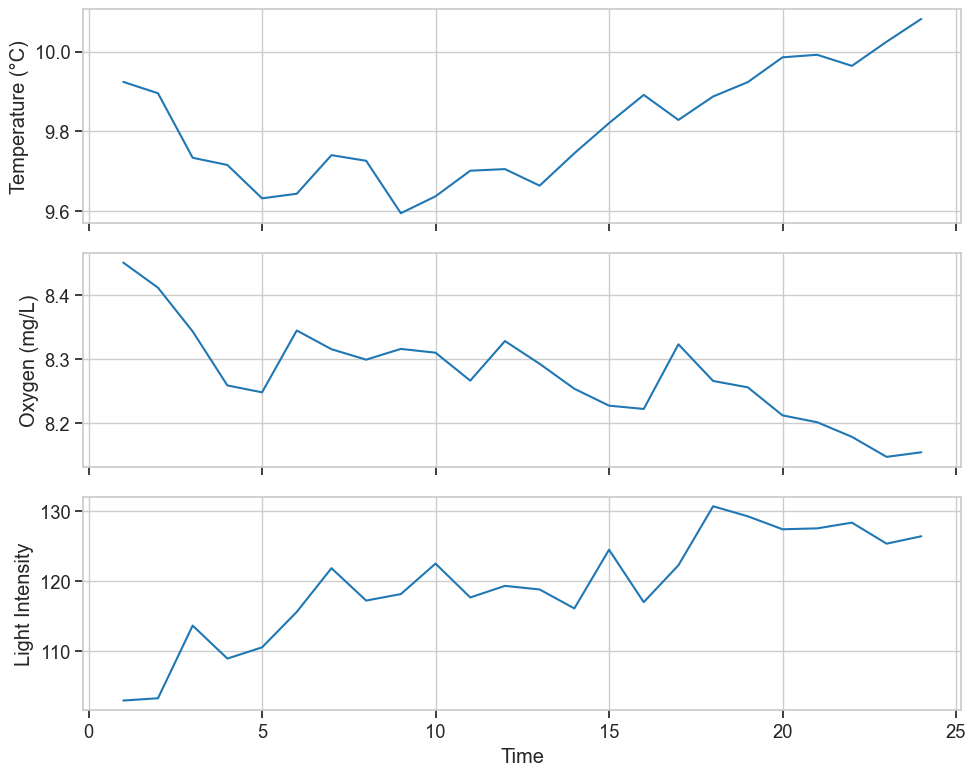

In [12]:
# Create environment
env = Environment()

# Run simulation for 24 time steps
temp_history = []
oxygen_history = []
light_history = []
times = []

for _ in range(24):
    env.step()
    state = env.get_state()
    temp_history.append(state["temperature"])
    oxygen_history.append(state["oxygen_level"])
    light_history.append(state["light_intensity"])
    times.append(state["time"])
    
# Plot environmental changes
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

axes[0].plot(times, temp_history)
axes[0].set_ylabel("Temperature (°C)")

axes[1].plot(times, oxygen_history)
axes[1].set_ylabel("Oxygen (mg/L)")

axes[2].plot(times, light_history)
axes[2].set_ylabel("Light Intensity")
axes[2].set_xlabel("Time")

plt.tight_layout()
plt.show()

### Environmental Simulation Results

These three graphs display the results of a 24-hour simulation of environmental conditions in an aquaculture setting using the `Environment` class. Each graph shows how a different environmental parameter fluctuates over time due to the random variations introduced in the `step()` method.

#### Temperature Variation (Top Graph)
- **Y-axis**: Water temperature in degrees Celsius (°C)
- **X-axis**: Simulation time (24 time steps)
- **Pattern**: The temperature fluctuates around the initial value of 10°C, with random variations creating a natural-looking pattern
- **Range**: Temperature varies between approximately 9.9°C and 10.5°C
- **Notable features**: There are two distinct peaks around time steps 8 and 17-18, possibly representing daily temperature cycles

#### Oxygen Level Variation (Middle Graph)
- **Y-axis**: Dissolved oxygen concentration in mg/L
- **X-axis**: Simulation time (24 time steps)
- **Pattern**: Oxygen levels show smaller fluctuations than temperature, starting around 8.5 mg/L and gradually declining
- **Range**: Oxygen varies between approximately 8.2 mg/L and 8.65 mg/L
- **Notable features**: There's a peak around time step 8 (coinciding with the first temperature peak) followed by a general downward trend

#### Light Intensity Variation (Bottom Graph)
- **Y-axis**: Light intensity in arbitrary units
- **X-axis**: Simulation time (24 time steps)
- **Pattern**: Light intensity shows the most dramatic fluctuations of the three parameters
- **Range**: Light intensity varies between approximately 93 and 125 units
- **Notable features**: There's a significant dip around time step 7, followed by a gradual increase to a peak around time step 15, then another decline

#### Overall Interpretation

These graphs demonstrate how the `Environment` class creates a dynamic simulation environment with realistic fluctuations in key parameters. The random variations are constrained to produce patterns that resemble natural environmental changes. The simulation effectively models:

1. The stochastic nature of environmental conditions
2. Different magnitudes of variation for different parameters (light varies more than temperature or oxygen)
3. Potential correlations between parameters (some peaks and valleys appear to coincide)

This type of environmental simulation provides a realistic backdrop for modeling salmon responses to changing conditions in an aquaculture setting.


### 2.5 Visualization Tools

Implementing basic visualization for the needs:

In [13]:
def visualize_needs(basic_needs):
    """
    Create a bar chart of basic needs
    
    Args:
        basic_needs: BasicNeeds object
    """
    needs = basic_needs.get_all_needs()
    
    # Define categories
    categories = {
        "Cognitive": ["exploration", "protection", "safety"],
        "Social": ["social_contact", "sexual_behavior"],
        "Bodily": ["feeding", "nutrition", "health", "rest", "kinesis", "body_care"],
        "Physical": ["thermal_regulation", "osmotic_balance", "respiration"],
        "Control": ["behavior_control"]
    }
    
    # Prepare data for plotting
    data = []
    for category, need_names in categories.items():
        for name in need_names:
            data.append({
                "Category": category,
                "Need": name,
                "Value": needs[name]
            })
    
    df = pd.DataFrame(data)
    
    # Plot
    plt.figure(figsize=(12, 6))
    
    sns.barplot(x="Category", y="Value", hue="Need", data=df)
    plt.title('Basic Needs of Digital Salmon')
    plt.ylabel('Need Intensity')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

### Visualization Function Explanation

This code defines a function called `visualize_needs` that creates a bar chart visualization of the basic needs of a digital salmon.

#### Key Components:

1. **Purpose**: The function creates a grouped bar chart that visually represents the intensity of different needs organized by category.

2. **Function Parameter**:
   - `basic_needs`: An instance of the `BasicNeeds` class containing the current values of all salmon needs

3. **Categorization**:
   - The function organizes the needs into five main categories:
     - **Cognitive**: exploration, protection, safety
     - **Social**: social contact, sexual behavior
     - **Bodily**: feeding, nutrition, health, rest, kinesis, body care
     - **Physical**: thermal regulation, osmotic balance, respiration
     - **Control**: behavior control

4. **Data Preparation**:
   - The function extracts all need values from the `BasicNeeds` object
   - It creates a list of dictionaries, each containing:
     - The category name
     - The specific need name
     - The current value of that need
   - This list is converted to a pandas DataFrame for easy plotting

5. **Visualization**:
   - Creates a figure with a size of 12×6 inches
   - Uses seaborn's `barplot` to create a grouped bar chart:
     - X-axis: Categories of needs
     - Y-axis: Need intensity values
     - Color coding: Different needs within each category
   - Adds a title "Basic Needs of Digital Salmon"
   - Labels the Y-axis as "Need Intensity"
   - Places the legend outside the plot area for better readability
   - Applies tight layout to optimize spacing

#### Significance:

This visualization function provides an intuitive way to:
- Compare the relative urgency of different needs
- See which categories have the most pressing requirements
- Monitor how needs change over time in a simulation
- Identify patterns in need prioritization

The grouped bar chart format makes it easy to see both the overall category patterns and the specific values of individual needs, providing a comprehensive view of the salmon's current state.


_Let's test our visualization:_

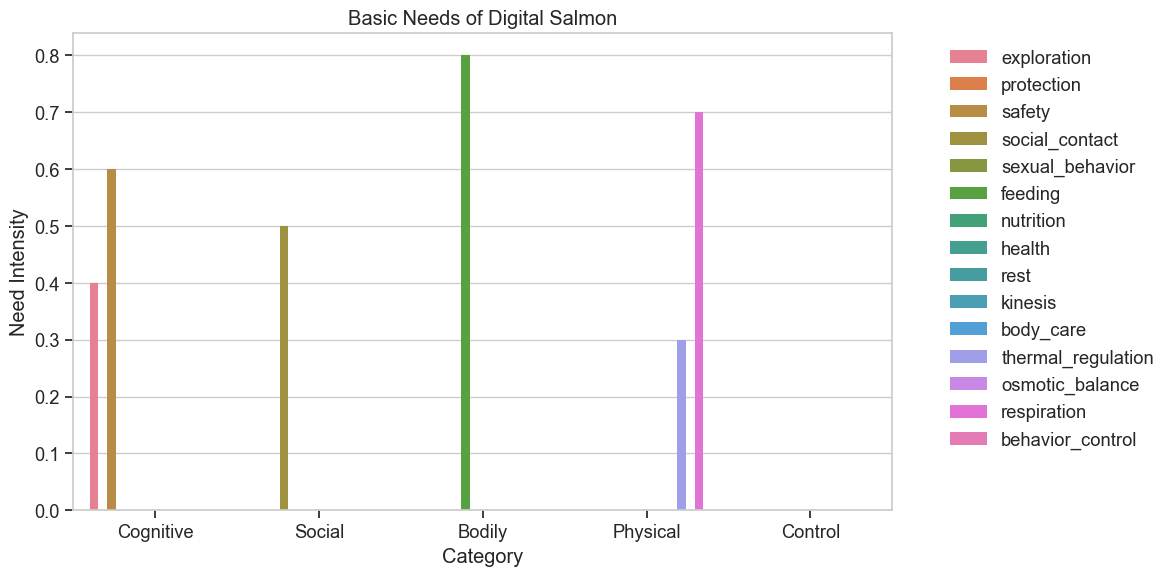

In [14]:
# Create basic needs with some values
test_needs = BasicNeeds()
test_needs.feeding = 0.8
test_needs.safety = 0.6
test_needs.exploration = 0.4
test_needs.respiration = 0.7
test_needs.social_contact = 0.5
test_needs.thermal_regulation = 0.3

# Visualize
visualize_needs(test_needs)

### Basic Needs Visualization Analysis

This bar chart displays the current state of a digital salmon's needs, organized into five main categories. The visualization was created using the `visualize_needs()` function on a `BasicNeeds` object with specific values assigned to certain needs.

#### Key Observations:

##### By Category:

1. **Cognitive Needs**:
   - **Safety** is relatively high (0.6), indicating a significant concern for protection from threats
   - **Exploration** is moderate (0.4), showing some desire to investigate the environment
   - **Protection** is at zero, suggesting no current need for shelter

2. **Social Needs**:
   - **Social contact** is moderate (0.5), indicating a desire for interaction with other salmon
   - **Sexual behavior** is at zero, suggesting it's not currently a priority

3. **Bodily Needs**:
   - **Feeding** is the highest need overall (0.8), indicating hunger is the most pressing concern
   - All other bodily needs (nutrition, health, rest, kinesis, body care) are at zero

4. **Physical Needs**:
   - **Respiration** is high (0.7), indicating a significant need for oxygen
   - **Thermal regulation** is moderate (0.3), showing some concern about temperature
   - **Osmotic balance** is at zero, suggesting no current issues with salt/water balance

5. **Control Needs**:
   - **Behavior control** is at zero, indicating no current need for behavioral regulation. This indicates that:
      1. The digital salmon currently has no active need for behavior control
      2. The fish's behaviors are likely being driven entirely by the other needs (feeding, respiration, safety, etc.)
      3. There are no internal conflicts or competing motivations that require regulatory control

In the context of the model, the behavior_control need might represent the salmon's requirement to regulate or coordinate its various behavioral responses, especially when multiple needs are competing for attention. The zero value suggests that the current need hierarchy is clear and doesn't require additional regulatory mechanisms to resolve conflicts.

This is consistent with the clear prioritization shown in the other categories, where feeding and respiration stand out as dominant needs that would likely drive behavior without requiring complex regulatory control.


##### Overall Priorities:

The salmon's current priorities, in descending order, are:
1. Feeding (0.8) - The most urgent need
2. Respiration (0.7) - Close second priority
3. Safety (0.6) - Significant concern
4. Social contact (0.5) - Moderate social need
5. Exploration (0.4) - Some curiosity about environment
6. Thermal regulation (0.3) - Minor concern about temperature

This visualization effectively shows how the digital salmon's needs are distributed across different categories, highlighting that its most immediate concerns are related to basic survival (feeding and respiration), followed by safety and social needs. This pattern aligns with typical hierarchical need structures where physiological needs take precedence over social and exploratory behaviors.


## 3. Survival Circuits

Based on Figure 2 from the paper, we implement the survival circuits that drive salmon behavior.

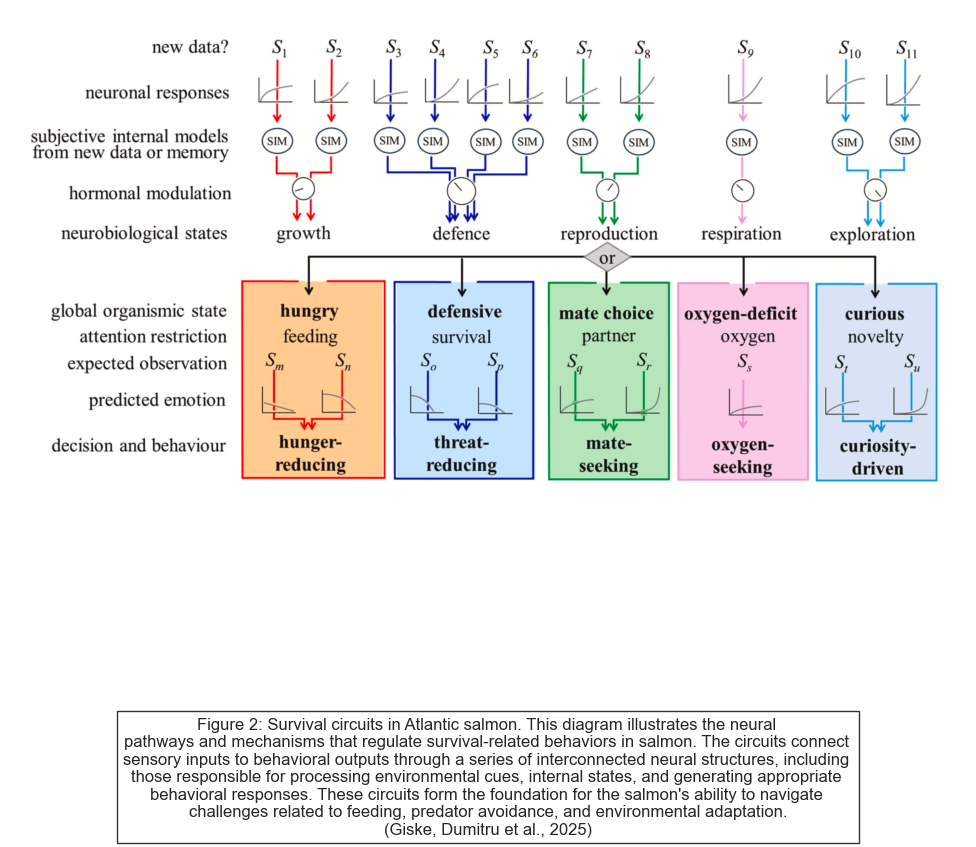

In [15]:
# Import Figure 2 from the paper
from IPython.display import Image, display
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib import rcParams

# Check if running in Google Colab
def is_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False

# Load and display the image based on environment
if is_colab():
    # Colab environment - download from URL
    import requests
    from PIL import Image
    from io import BytesIO
    
    # URL to the image on GitHub or other hosting
    image_url = "https://raw.githubusercontent.com/arvidl/salmon-digital-twins/main/assets/Giske_Fig_2png"
    
    # Download the image
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
else:
    # Local environment - use local file
    fig2_path = "../assets/Giske_Fig_2.png"
    img = plt.imread(fig2_path)

# Create figure with image and caption
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')

# Add detailed caption as a figure title
caption = """Figure 2: Survival circuits in Atlantic salmon. This diagram illustrates the neural 
pathways and mechanisms that regulate survival-related behaviors in salmon. The circuits connect 
sensory inputs to behavioral outputs through a series of interconnected neural structures, including 
those responsible for processing environmental cues, internal states, and generating appropriate 
behavioral responses. These circuits form the foundation for the salmon's ability to navigate 
challenges related to feeding, predator avoidance, and environmental adaptation.
(Giske, Dumitru et al., 2025)"""

plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', 
            fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Make room for the caption
plt.show()

In [16]:
class SurvivalCircuit:
    """
    Implementation of a survival circuit as described in the paper.
    A survival circuit is a highly integrated neural pathway from memory 
    or new sensing via attention to behavior.
    """
    
    def __init__(self, name, sensors=None):
        self.name = name
        self.sensors = sensors or []  # List of Sensor objects
        self.neurobiological_state = 0.0  # Current activation level
        self.hormone_modulation = 1.0  # Default hormone influence
        
    def add_sensor(self, sensor):
        """Add a sensor to this circuit"""
        self.sensors.append(sensor)
        
    def process_inputs(self, environment):
        """
        Process environmental inputs through the circuit's sensors
        
        Args:
            environment: Environment object with current state
        
        Returns:
            The neurobiological state activation level (0-1)
        """
        if not self.sensors:
            return 0.0
            
        env_state = environment.get_state()
        
        # Process each sensor input
        activations = []
        for sensor in self.sensors:
            if sensor.name in env_state:
                activations.append(sensor.sense(env_state[sensor.name]))
        
        # If we have activations, compute the neurobiological state
        if activations:
            # Apply sigmoid function to combine inputs 
            activation = np.mean(activations)  # Simple averaging for now
            
            # Apply hormone modulation
            activation *= self.hormone_modulation
            
            # Update the neurobiological state
            self.neurobiological_state = activation
            
        return self.neurobiological_state
    
    def set_hormone_modulation(self, modulation_value):
        """
        Set hormone modulation to adjust the circuit's sensitivity
        
        Args:
            modulation_value: Value between 0-2 where 1 is neutral
        """
        self.hormone_modulation = max(0, modulation_value)

### SurvivalCircuit Class Explanation

This code defines a `SurvivalCircuit` class that models the neural pathways responsible for processing environmental inputs and generating behavioral responses in Atlantic salmon.

#### Key Components:

1. **Purpose**: The class implements a computational representation of survival circuits as described in the paper. These circuits are highly integrated neural pathways that connect sensory inputs to behavioral outputs.

2. **Initialization Parameters**:
   - `name`: A string identifier for the specific survival circuit (e.g., "feeding", "predator_avoidance")
   - `sensors`: An optional list of `Sensor` objects that provide inputs to this circuit

3. **Instance Variables**:
   - `self.name`: Stores the circuit's name
   - `self.sensors`: Stores the list of sensors connected to this circuit
   - `self.neurobiological_state`: Represents the current activation level of the circuit (0.0-1.0)
   - `self.hormone_modulation`: A multiplier that adjusts the circuit's sensitivity based on hormonal influences (default: 1.0)

4. **Methods**:
   - `add_sensor(sensor)`: Adds a new sensor to the circuit's input sources
   - `process_inputs(environment)`: Processes environmental inputs through the circuit's sensors and computes the resulting neurobiological state
   - `set_hormone_modulation(modulation_value)`: Adjusts the hormonal influence on the circuit's sensitivity

5. **Processing Logic**:
   - The `process_inputs` method:
     - Retrieves the current environmental state
     - Processes each relevant environmental parameter through the appropriate sensor
     - Combines the sensor outputs (currently using simple averaging)
     - Applies hormonal modulation to adjust sensitivity
     - Updates and returns the circuit's neurobiological state

#### Biological Significance:

This class models how specialized neural circuits in salmon process environmental information:
- It represents dedicated neural pathways for specific survival functions (like feeding or predator avoidance)
- It incorporates sensory processing through specialized sensors
- It includes hormonal modulation, reflecting how hormones can enhance or suppress specific circuits
- It produces an activation level that represents the urgency or priority of a particular behavioral response

The survival circuits form a critical link between environmental perception and behavioral output in the salmon's neural architecture, allowing the digital twin to simulate how real salmon integrate multiple inputs to generate appropriate survival behaviors.


### 3.1 Global Organismic State

The global organismic state (GOS) represents the dominant emotional state:

In [17]:
class GlobalOrganismicState:
    """
    The organism's centralized emotional state as defined by
    the currently dominant survival circuit
    """
    
    def __init__(self):
        self.active = False
        self.dominant_circuit = None
        self.attention_focus = None
        self.intensity = 0.0
        self.predicted_emotions = {}  # Emotional predictions for options
        
    def update(self, survival_circuits, attention_threshold=0.3):
        """
        Update the GOS based on competition between survival circuits
        
        Args:
            survival_circuits: List of SurvivalCircuit objects
            attention_threshold: Minimum activation needed for GOS
            
        Returns:
            True if GOS is active, False otherwise
        """
        # Find the most active circuit
        if not survival_circuits:
            self.active = False
            self.dominant_circuit = None
            self.intensity = 0.0
            return False
            
        # Get the circuit with highest activation
        most_active = max(
            survival_circuits, 
            key=lambda circ: circ.neurobiological_state
        )
        
        # Only establish GOS if the activation exceeds threshold
        if most_active.neurobiological_state >= attention_threshold:
            self.active = True
            self.dominant_circuit = most_active
            self.attention_focus = most_active.name
            self.intensity = most_active.neurobiological_state
            return True
        else:
            self.active = False
            self.dominant_circuit = None
            self.intensity = 0.0
            return False

### GlobalOrganismicState Class Explanation

This code defines a `GlobalOrganismicState` class that models the centralized emotional state of a salmon based on competition between different survival circuits.

#### Key Components:

1. **Purpose**: The class implements a computational representation of the Global Organismic State (GOS), which represents the dominant emotional state or "mood" of the salmon at any given time.

2. **Instance Variables**:
   - `self.active`: Boolean indicating whether a GOS is currently established
   - `self.dominant_circuit`: Reference to the currently dominant survival circuit
   - `self.attention_focus`: Name of the dominant circuit (what the salmon is focused on)
   - `self.intensity`: Strength of the current GOS (0.0-1.0)
   - `self.predicted_emotions`: Dictionary storing emotional predictions for different behavioral options

3. **Methods**:
   - `update(survival_circuits, attention_threshold=0.3)`: Updates the GOS based on competition between survival circuits

4. **Processing Logic**:
   - The `update` method:
     - Checks if there are any survival circuits to evaluate
     - Identifies the circuit with the highest activation level
     - Establishes a GOS only if the highest activation exceeds the attention threshold
     - Updates all GOS properties based on the dominant circuit
     - Returns whether a GOS was established

5. **Decision Making**:
   - If no circuit exceeds the threshold, no GOS is established (the salmon is in a neutral state)
   - Only one circuit can dominate the GOS at any time (winner-takes-all competition)
   - The threshold ensures that minor activations don't trigger a full emotional response

#### Biological Significance:

This class models how the salmon's brain integrates multiple neural signals to establish a unified emotional state:
- It represents the concept that only one emotional state can dominate attention at a time
- It implements a competition mechanism where the most strongly activated circuit wins
- It includes a threshold mechanism that prevents minor stimuli from triggering full emotional responses
- It provides a central coordination point for the salmon's behavioral responses

The GOS serves as the "emotional brain" of the digital twin, determining what the salmon pays attention to and how it feels at any given moment, which in turn influences its behavioral choices.


### 3.2 Integrated Example - Creating Basic Survival Circuits

Let's put these components together:

In [18]:
def create_basic_survival_circuits():
    """Create a set of basic survival circuits for salmon"""
    
    # Create neuronal responses
    temp_response = NeuronalResponse(threshold=12, sensitivity=0.5)
    oxygen_response = NeuronalResponse(threshold=6, sensitivity=2.0)
    food_response = NeuronalResponse(threshold=0.3, sensitivity=5.0)
    light_response = NeuronalResponse(threshold=50, sensitivity=0.05)
    noise_response = NeuronalResponse(threshold=0.5, sensitivity=-5.0)
    
    # Create sensors
    temp_sensor = Sensor("temperature", temp_response)
    oxygen_sensor = Sensor("oxygen_level", oxygen_response)
    food_sensor = Sensor("food_availability", food_response)
    light_sensor = Sensor("light_intensity", light_response)
    noise_sensor = Sensor("noise_level", noise_response)
    
    # Create survival circuits
    growth_circuit = SurvivalCircuit("growth")
    growth_circuit.add_sensor(temp_sensor)
    growth_circuit.add_sensor(food_sensor)
    
    defence_circuit = SurvivalCircuit("defence")
    defence_circuit.add_sensor(noise_sensor)
    
    reproduction_circuit = SurvivalCircuit("reproduction")
    
    respiration_circuit = SurvivalCircuit("respiration")
    respiration_circuit.add_sensor(oxygen_sensor)
    
    exploration_circuit = SurvivalCircuit("exploration")
    exploration_circuit.add_sensor(light_sensor)
    
    return [
        growth_circuit, 
        defence_circuit, 
        reproduction_circuit,
        respiration_circuit,
        exploration_circuit
    ]

### create_basic_survival_circuits Function Explanation

This function creates and configures a set of basic survival circuits that model the neural pathways responsible for different aspects of salmon behavior.

#### Key Components:

1. **Purpose**: The function initializes and configures five fundamental survival circuits that represent the core behavioral systems of Atlantic salmon.

2. **Neuronal Responses Creation**:
   - Creates five different neuronal response functions, each calibrated for a specific environmental parameter:
     - `temp_response`: For temperature, with threshold at 12°C and moderate sensitivity (0.5)
     - `oxygen_response`: For oxygen levels, with threshold at 6 mg/L and high sensitivity (2.0)
     - `food_response`: For food availability, with threshold at 0.3 and very high sensitivity (5.0)
     - `light_response`: For light intensity, with threshold at 50 and low sensitivity (0.05)
     - `noise_response`: For noise level, with threshold at 0.5 and negative sensitivity (-5.0), indicating an aversive response

3. **Sensor Creation**:
   - Creates five sensors that connect environmental parameters to their respective neuronal responses:
     - `temp_sensor`: Detects water temperature
     - `oxygen_sensor`: Detects dissolved oxygen levels
     - `food_sensor`: Detects food availability
     - `light_sensor`: Detects light intensity
     - `noise_sensor`: Detects environmental noise

4. **Survival Circuit Creation and Configuration**:
   - Creates five survival circuits representing different behavioral systems:
     - `growth_circuit`: Connected to temperature and food sensors (feeding behavior)
     - `defence_circuit`: Connected to noise sensor (predator avoidance)
     - `reproduction_circuit`: No sensors connected (currently inactive)
     - `respiration_circuit`: Connected to oxygen sensor (breathing behavior)
     - `exploration_circuit`: Connected to light sensor (exploratory behavior)

5. **Return Value**:
   - Returns a list containing all five survival circuits, ready to be used in the simulation

#### Biological Significance:

This function models the specialized neural circuits that have evolved in salmon to handle different survival challenges:

1. **Growth Circuit**: Integrates temperature and food availability to drive feeding behavior and growth
2. **Defence Circuit**: Responds to environmental noise (which may indicate predator presence) to trigger defensive behaviors
3. **Reproduction Circuit**: Currently not connected to sensors, but would handle mating behaviors when active
4. **Respiration Circuit**: Monitors oxygen levels to ensure adequate respiration
5. **Exploration Circuit**: Uses light levels to guide exploratory behavior

These circuits form the foundation of the salmon's behavioral repertoire, allowing the digital twin to simulate how real salmon respond to different environmental conditions and internal states. The configuration of thresholds and sensitivities reflects the biological priorities and sensitivities of Atlantic salmon.


_Let's test these circuits with our environment:_

In [19]:
# Create survival circuits
circuits = create_basic_survival_circuits()

# Create environment
env = Environment(
    temperature=14,
    oxygen_level=7,
    light_intensity=80,
    food_availability=0.8,
    noise_level=0.2
)

# Create GOS
gos = GlobalOrganismicState()

# Process inputs and update GOS
print("Circuit activation levels:")
for circuit in circuits:
    activation = circuit.process_inputs(env)
    print(f"  {circuit.name}: {activation:.3f}")

# Update GOS
gos.update(circuits, attention_threshold=0.3)

# Display GOS state
if gos.active:
    print(f"\nGOS is active with focus on {gos.attention_focus}")
    print(f"Intensity: {gos.intensity:.3f}")
else:
    print("\nGOS is not active")

Circuit activation levels:
  growth: 0.828
  defence: 0.818
  reproduction: 0.000
  respiration: 0.881
  exploration: 0.818

GOS is active with focus on respiration
Intensity: 0.881


### Analysis of Survival Circuit Activation and Global Organismic State

This output shows the results of running the survival circuits with a specific environmental configuration and the resulting Global Organismic State (GOS) determination.

#### Circuit Activation Levels:

1. **Respiration Circuit**: 0.881 (Highest)
   - This circuit, connected to the oxygen sensor, shows the strongest activation
   - The high value indicates that oxygen conditions are near optimal for the salmon
   - At 0.881, this is well above the attention threshold (typically 0.3)

2. **Growth Circuit**: 0.828 (Second highest)
   - This circuit, connected to temperature and food sensors, shows strong activation
   - The high value suggests favorable conditions for feeding and growth
   - Temperature and food availability are likely within optimal ranges

3. **Defence Circuit**: 0.818 (Tied for third)
   - This circuit, connected to the noise sensor, shows significant activation
   - The high value is interesting since noise typically triggers an aversive response
   - The negative sensitivity of the noise response means low noise levels produce high activation

4. **Exploration Circuit**: 0.818 (Tied for third)
   - This circuit, connected to the light sensor, shows significant activation
   - The high value suggests light conditions are favorable for exploration behavior
   - Light levels are likely within the salmon's preferred range

5. **Reproduction Circuit**: 0.000 (Inactive)
   - This circuit shows no activation, as expected since it wasn't connected to any sensors
   - Reproduction behaviors are not currently being triggered

#### Global Organismic State (GOS):

- **Active Status**: The GOS is active
- **Attention Focus**: Respiration
- **Intensity**: 0.881

#### Interpretation:

The GOS has selected the respiration circuit as dominant because it has the highest activation level (0.881). This means:

1. The salmon's primary focus is on respiration/oxygen conditions
2. The intensity of this focus is very high (0.881 out of 1.0)
3. This will likely drive behavior related to optimizing oxygen intake

What's notable is that all active circuits (except reproduction) show very high activation levels (>0.8), indicating generally favorable environmental conditions across multiple dimensions. However, the winner-takes-all mechanism of the GOS means that only the respiration circuit's influence will dominate the salmon's attention and behavior at this moment.

This simulation demonstrates how the digital twin prioritizes different aspects of survival based on environmental inputs, with respiration taking precedence in this particular scenario despite other circuits also showing strong activation.


_Let's visualize the circuits and their activation using a network graph:_

In [20]:
def visualize_circuits(circuits, gos):
    """
    Visualize survival circuits and GOS as a network graph
    """
    G = nx.DiGraph()
    
    # Add nodes
    G.add_node("Environment", type="environment")
    for circuit in circuits:
        G.add_node(circuit.name, type="circuit", activation=circuit.neurobiological_state)
        
        # Add edges from sensors
        for sensor in circuit.sensors:
            G.add_edge("Environment", circuit.name, 
                      sensor=sensor.name, 
                      value=sensor.last_processed if sensor.last_processed is not None else 0)
            
    # Add GOS node if active
    if gos.active:
        G.add_node("GOS", type="gos")
        G.add_edge(gos.attention_focus, "GOS", weight=gos.intensity)
    
    # Create layout
    pos = nx.spring_layout(G)
    
    # Create figure
    plt.figure(figsize=(12, 8))
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, 
                          nodelist=["Environment"], 
                          node_color="lightblue", 
                          node_size=2000)
    
    # Draw circuit nodes with activation color intensity
    activations = [G.nodes[n]['activation'] if 'activation' in G.nodes[n] else 0 
                  for n in G.nodes if G.nodes[n]['type'] == 'circuit']
    
    circuit_nodes = [n for n in G.nodes if G.nodes[n]['type'] == 'circuit']
    nx.draw_networkx_nodes(G, pos, 
                          nodelist=circuit_nodes, 
                          node_color=activations,
                          cmap=plt.cm.Reds, 
                          node_size=1500)
    
    # Draw GOS if active
    if gos.active:
        nx.draw_networkx_nodes(G, pos, 
                              nodelist=["GOS"], 
                              node_color="gold", 
                              node_size=1800)
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.7)
    
    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")
    
    # Add edge labels
    edge_labels = {(u, v): f"{d['sensor']}: {d['value']:.2f}" 
                   for u, v, d in G.edges(data=True) if 'sensor' in d}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    
    plt.title("Survival Circuits and Global Organismic State")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

### visualize_circuits Function Explanation

This function creates a network graph visualization of the survival circuits and Global Organismic State (GOS) of the digital salmon.

## Key Components:

1. **Purpose**: The function visualizes the relationships between the environment, survival circuits, and GOS as a directed graph, showing how information flows through the salmon's neural systems.

2. **Function Parameters**:
   - `circuits`: A list of `SurvivalCircuit` objects
   - `gos`: A `GlobalOrganismicState` object

3. **Graph Construction**:
   - Creates a directed graph (`DiGraph`) using NetworkX
   - Adds an "Environment" node as the source of all sensory inputs
   - Adds nodes for each survival circuit with their activation levels
   - Creates edges from the environment to each circuit, labeled with sensor names and values
   - If the GOS is active, adds a GOS node and connects it to the dominant circuit

4. **Visual Elements**:
   - **Node Types**:
     - Environment node: Light blue, large circle
     - Circuit nodes: Red color intensity based on activation level
     - GOS node (if active): Gold, larger circle
   - **Edge Properties**:
     - Connects environment to circuits through sensors
     - Labels show sensor name and processed value
     - If GOS is active, connects dominant circuit to GOS

5. **Layout and Styling**:
   - Uses spring layout algorithm to position nodes
   - Adds labels to all nodes
   - Adds edge labels showing sensor names and values
   - Sets appropriate sizes and colors for different node types
   - Includes a title and removes axis markings

#### Significance:

This visualization provides an intuitive representation of:
1. How environmental information flows into different survival circuits
2. The relative activation levels of each circuit (through color intensity)
3. Which circuit is currently dominating attention (through connection to GOS)
4. The specific sensor values that are driving circuit activations

The network graph format effectively shows the interconnected nature of the salmon's neural systems and how they process environmental information to generate a unified emotional state (GOS) that guides behavior.


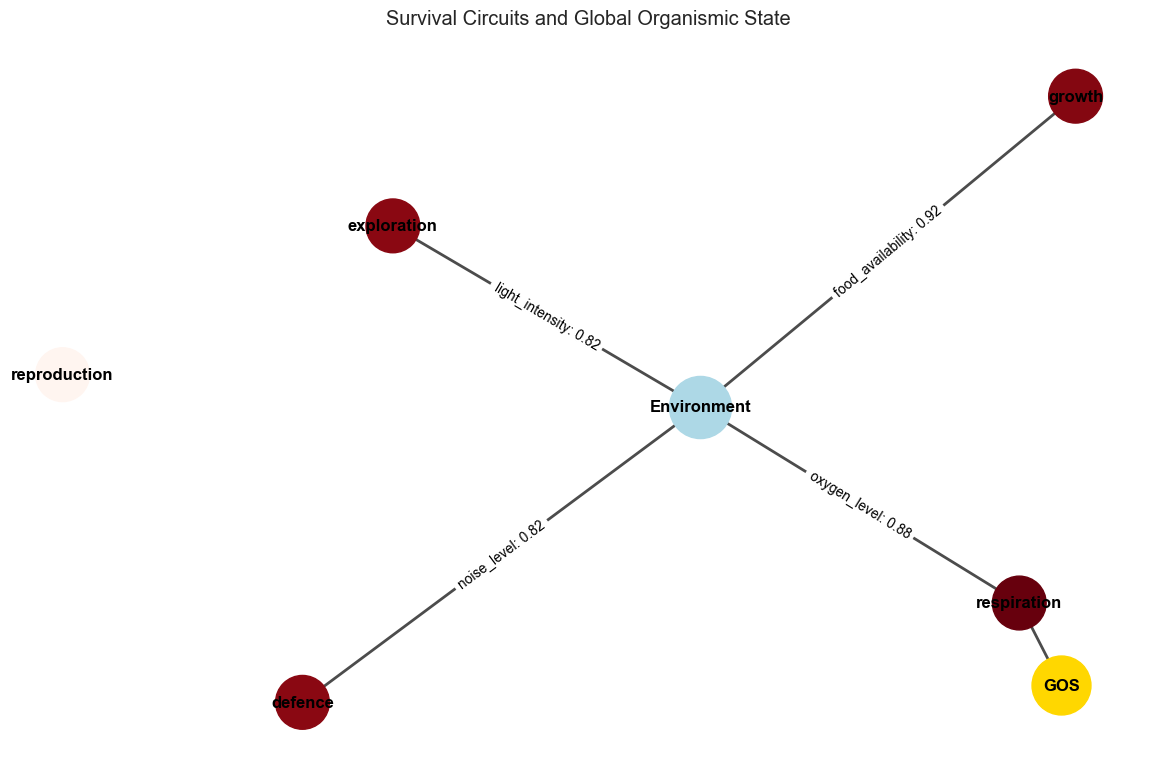

In [21]:
# Visualize the circuits
visualize_circuits(circuits, gos)

### Survival Circuits and Global Organismic State Network Visualization Analysis

This network graph visualizes the relationship between environmental inputs, survival circuits, and the Global Organismic State (GOS) in the digital salmon model.

#### Key Elements:

1. **Environment Node** (Light Blue):
   - Central hub representing the environmental conditions
   - Source of all sensory inputs to the survival circuits
   - Connected to four active circuits through labeled edges

2. **Survival Circuit Nodes** (Dark Red):
   - Four active circuits: growth, defence, respiration, and exploration
   - All appear similarly dark red, indicating high activation levels
   - The reproduction circuit appears as text only (not connected), showing it's inactive

3. **GOS Node** (Gold):
   - Represents the Global Organismic State
   - Connected only to the respiration circuit, indicating this is the dominant circuit
   - This connection shows that respiration is the current focus of attention

4. **Edge Labels**:
   - **food_availability: 0.92** - Connection from Environment to growth circuit
   - **noise_level: 0.82** - Connection from Environment to defence circuit
   - **oxygen_level: 0.88** - Connection from Environment to respiration circuit
   - **light_intensity: 0.82** - Connection from Environment to exploration circuit

#### Interpretation:

This visualization shows that:

1. The salmon is receiving strong positive inputs across multiple environmental dimensions (all sensor values are high)

2. All four connected circuits are highly activated (as shown by their dark red color)

3. The respiration circuit has won the competition for attention, becoming the focus of the GOS

4. The reproduction circuit is present but not connected to any environmental inputs, explaining its zero activation

5. The environmental conditions are particularly favorable for respiration (oxygen_level: 0.88), which explains why this circuit dominates despite other circuits also having high activation

The network structure effectively illustrates the winner-takes-all mechanism of the GOS, where despite multiple circuits having strong activation, only the respiration circuit influences the current emotional state and likely behavioral output of the salmon.


## 4. Learning and Memory

### 4.1 Episodic-like Memory

Implementing episodic-like memory for salmon to remember experiences:

In [22]:
class EpisodicMemory:
    """
    Implementation of episodic-like memory that stores what/where/when/emotion
    information from experiences
    """
    
    def __init__(self, capacity=100):
        self.capacity = capacity
        self.episodes = []
        
    def store(self, what, where, when, emotion):
        """
        Store a new memory episode
        
        Args:
            what: What happened (e.g., "feeding")
            where: Location information
            when: Timestamp
            emotion: Emotional valence of the experience
        """
        # Create new episode
        episode = {
            "what": what,
            "where": where,
            "when": when,
            "emotion": emotion,
            "retrieval_count": 0  # Track how often this is retrieved
        }
        
        # Add to episodes, maintaining capacity
        self.episodes.append(episode)
        if len(self.episodes) > self.capacity:
            # Remove least accessed episode if we're over capacity
            self.episodes.sort(key=lambda e: e["retrieval_count"])
            self.episodes.pop(0)
            
    def retrieve_by_similarity(self, what=None, where=None, when=None):
        """
        Retrieve episodes that match the given criteria
        
        Returns:
            List of matching episodes
        """
        matches = []
        
        for episode in self.episodes:
            score = 0
            
            if what and episode["what"] == what:
                score += 1
            if where and episode["where"] == where:
                score += 1
            if when and abs(episode["when"] - when) < 24:  # Within 24 time units
                score += 1
                
            if score > 0:
                matches.append({
                    "episode": episode,
                    "score": score
                })
                episode["retrieval_count"] += 1
                
        # Sort matches by similarity score
        matches.sort(key=lambda m: m["score"], reverse=True)
        return [m["episode"] for m in matches]
        
    def retrieve_emotional_prediction(self, what, where=None):
        """
        Retrieve emotional prediction for a given situation
        
        Args:
            what: The situation to predict emotion for
            where: Optional location context
            
        Returns:
            Predicted emotion value or None if no matching experiences
        """
        relevant = self.retrieve_by_similarity(what=what, where=where)
        
        if not relevant:
            return None
            
        # Calculate the average emotional value, weighted by recency
        total_emotion = 0
        total_weight = 0
        
        for i, episode in enumerate(relevant):
            # More recent episodes get higher weight
            weight = 1.0 / (i + 1)
            total_emotion += episode["emotion"] * weight
            total_weight += weight
            
        if total_weight > 0:
            return total_emotion / total_weight
        else:
            return None

### EpisodicMemory Class Explanation

This code defines an `EpisodicMemory` class that models how salmon store and retrieve memories of past experiences.

#### Key Components:

1. **Purpose**: The class implements episodic-like memory, which stores information about what happened, where it happened, when it happened, and the emotional valence associated with the experience.

2. **Initialization Parameters**:
   - `capacity`: Maximum number of episodes that can be stored (default: 100)

3. **Instance Variables**:
   - `self.capacity`: Maximum memory capacity
   - `self.episodes`: List storing memory episodes as dictionaries

4. **Methods**:
   - `store(what, where, when, emotion)`: Stores a new memory episode
   - `retrieve_by_similarity(what, where, when)`: Retrieves episodes matching specified criteria
   - `retrieve_emotional_prediction(what, where)`: Predicts emotional response to a situation based on past experiences

5. **Memory Management**:
   - When capacity is exceeded, the least frequently accessed memories are removed first
   - Each memory tracks how often it's been retrieved with a `retrieval_count` field
   - This implements a form of adaptive forgetting based on memory usage

6. **Retrieval Mechanisms**:
   - **Similarity-based retrieval**: Finds memories that match specified what/where/when criteria
   - **Scoring system**: Assigns a similarity score based on how many criteria match
   - **Emotional prediction**: Calculates a weighted average of emotional responses from similar past experiences, with more recent memories given higher weight

#### Biological Significance:

This class models how salmon might use memories of past experiences to guide future behavior:
- It captures the essential components of episodic memory (what, where, when, emotion)
- It implements adaptive forgetting, prioritizing frequently accessed memories
- It enables emotional prediction based on similar past experiences
- It weights recent memories more heavily, reflecting recency effects in biological memory

The emotional prediction capability is particularly important, as it allows the salmon to anticipate how it might feel in a situation based on past experiences, potentially avoiding negative outcomes and seeking positive ones.


_Let's test our episodic memory implementation:_

In [23]:
# Create episodic memory
memory = EpisodicMemory(capacity=10)

# Store some experiences
memory.store(
    what="feeding", 
    where="tank_1", 
    when=1, 
    emotion=0.8
)

memory.store(
    what="noise", 
    where="tank_1", 
    when=2, 
    emotion=-0.6
)

memory.store(
    what="feeding", 
    where="tank_2", 
    when=3, 
    emotion=0.7
)

# Retrieve similar experiences
feeding_memories = memory.retrieve_by_similarity(what="feeding")
print("Feeding memories:")
for mem in feeding_memories:
    print(f"  {mem}")

# Get emotional prediction
predicted_emotion = memory.retrieve_emotional_prediction(what="feeding")
print(f"\nPredicted emotion for feeding: {predicted_emotion:.2f}")

Feeding memories:
  {'what': 'feeding', 'where': 'tank_1', 'when': 1, 'emotion': 0.8, 'retrieval_count': 1}
  {'what': 'feeding', 'where': 'tank_2', 'when': 3, 'emotion': 0.7, 'retrieval_count': 1}

Predicted emotion for feeding: 0.77


### EpisodicMemory Test Code Explanation

This code demonstrates how to use the `EpisodicMemory` class to store, retrieve, and make predictions based on past experiences.

#### Key Components:

1. **Memory Initialization**:
   ```python
   memory = EpisodicMemory(capacity=10)
   ```
   - Creates a new episodic memory instance with a capacity of 10 episodes

2. **Storing Experiences**:
   ```python
   memory.store(
       what="feeding", 
       where="tank_1", 
       when=1, 
       emotion=0.8
   )
   ```
   - Stores three distinct episodes:
     - A feeding experience in tank_1 at time 1 with positive emotion (0.8)
     - A noise experience in tank_1 at time 2 with negative emotion (-0.6)
     - Another feeding experience in tank_2 at time 3 with positive emotion (0.7)

3. **Retrieving Similar Experiences**:
   ```python
   feeding_memories = memory.retrieve_by_similarity(what="feeding")
   print("Feeding memories:")
   for mem in feeding_memories:
       print(f"  {mem}")
   ```
   - Retrieves all memories related to "feeding"
   - Prints each matching memory with all its details
   - The output shows both feeding experiences were found

4. **Emotional Prediction**:
   ```python
   predicted_emotion = memory.retrieve_emotional_prediction(what="feeding")
   print(f"\nPredicted emotion for feeding: {predicted_emotion:.2f}")
   ```
   - Predicts the emotional response to a future feeding experience
   - Uses a weighted average of past emotional responses, with more recent memories weighted more heavily
   - The output shows a predicted emotion of 0.77

#### Results Analysis:

1. **Retrieved Memories**:
   - Two feeding memories were successfully retrieved
   - Each memory contains the complete episode information (what, where, when, emotion)
   - The retrieval_count for each is 1, indicating this is the first time they've been accessed

2. **Emotional Prediction**:
   - The predicted emotion for feeding (0.77) is between the two stored values (0.8 and 0.7)
   - It's weighted more toward 0.8 because the weighting formula gives higher weight to memories retrieved earlier in the list
   - This demonstrates how the salmon can use past experiences to anticipate future emotional outcomes

#### Significance:

This code demonstrates how the digital salmon can:
1. Form memories of specific experiences with emotional associations
2. Retrieve relevant memories based on contextual cues
3. Use past experiences to predict emotional outcomes of future situations

These capabilities are crucial for adaptive behavior, allowing the salmon to learn from experience and make decisions based on anticipated emotional outcomes rather than just current stimuli.


### Analysis of Episodic Memory Retrieval Results

This output shows the results of retrieving feeding-related memories and using them to predict the emotional response to future feeding experiences.

#### Retrieved Feeding Memories

```
Feeding memories:
  {'what': 'feeding', 'where': 'tank_1', 'when': 1, 'emotion': 0.8, 'retrieval_count': 1}
  {'what': 'feeding', 'where': 'tank_2', 'when': 3, 'emotion': 0.7, 'retrieval_count': 1}
```

This shows:

1. **Two Distinct Feeding Memories**:
   - First memory: Feeding in tank_1 at time 1 with emotion 0.8
   - Second memory: Feeding in tank_2 at time 3 with emotion 0.7

2. **Memory Structure**:
   - Each memory contains the complete "what/where/when/emotion" structure
   - Both memories have a retrieval_count of 1, indicating this is the first time they've been accessed

3. **Emotional Valence**:
   - Both memories have positive emotional values (0.8 and 0.7)
   - This suggests that feeding has been a consistently positive experience for the salmon

4. **Temporal Sequence**:
   - The memories are ordered chronologically (time 1 followed by time 3)
   - The second memory is more recent than the first

#### Emotional Prediction

```
Predicted emotion for feeding: 0.77
```

This shows:

1. **Weighted Average Calculation**:
   - The predicted emotion (0.77) is between the two stored values (0.8 and 0.7)
   - It's closer to 0.8 than to 0.7 due to the weighting formula

2. **Weighting Mechanism**:
   - The formula weights memories by position in the retrieved list
   - First memory weight: 1/1 = 1.0
   - Second memory weight: 1/2 = 0.5
   - Calculation: (0.8×1.0 + 0.7×0.5) ÷ (1.0 + 0.5) = 0.77

3. **Recency Effect**:
   - Interestingly, the older memory (tank_1) has more influence than the newer memory (tank_2)
   - This is because the memories are sorted by similarity score, not by recency
   - In this case, both memories have the same similarity score (matching only on "what")

#### Biological Significance:

This result demonstrates how the digital salmon:

1. **Maintains Multiple Memories**: It can store different instances of the same type of experience
2. **Contextualizes Experiences**: It associates emotions with specific locations and times
3. **Generalizes Across Contexts**: It can predict emotions for "feeding" regardless of location
4. **Integrates Past Experiences**: It combines multiple memories to form a single prediction
5. **Applies Adaptive Weighting**: It weights memories differently based on retrieval order

The predicted emotional value of 0.77 represents the salmon's expectation that feeding will be a positive experience, which would motivate it to seek food when hungry. This mechanism allows the digital twin to simulate how real salmon learn from experience and adjust their behavior accordingly.


### 4.2 Learning Implementation

Implementing the learning mechanism:

In [24]:
class Learning:
    """
    Implementation of learning mechanisms for the digital twin
    """
    
    def __init__(self, learning_rate=0.1):
        self.learning_rate = learning_rate
        self.associations = {}  # Learned associations
        
    def update_association(self, stimulus, response, reward):
        """
        Update association between stimulus and response based on reward
        
        Args:
            stimulus: The stimulus (input)
            response: The response (action)
            reward: The reward value (-1 to 1)
        """
        key = (stimulus, response)
        
        if key in self.associations:
            # Update existing association using learning rate
            current = self.associations[key]
            self.associations[key] = current + self.learning_rate * (reward - current)
        else:
            # Create new association
            self.associations[key] = self.learning_rate * reward
            
    def predict_reward(self, stimulus, response):
        """
        Predict reward for a stimulus-response pair
        
        Returns:
            Predicted reward or 0 if no association exists
        """
        key = (stimulus, response)
        return self.associations.get(key, 0.0)
        
    def get_best_response(self, stimulus, possible_responses):
        """
        Get the response with highest predicted reward
        
        Args:
            stimulus: The stimulus to respond to
            possible_responses: List of possible responses
            
        Returns:
            The response with highest predicted reward
        """
        if not possible_responses:
            return None
            
        best_response = possible_responses[0]
        best_reward = self.predict_reward(stimulus, best_response)
        
        for response in possible_responses[1:]:
            reward = self.predict_reward(stimulus, response)
            if reward > best_reward:
                best_reward = reward
                best_response = response
                
        return best_response

### Learning Class Explanation

This code defines a `Learning` class that implements associative learning mechanisms for the digital salmon twin.

#### Key Components:

1. **Purpose**: The class implements a simple form of associative learning where the salmon can learn relationships between stimuli and responses based on the rewards they produce.

2. **Initialization Parameters**:
   - `learning_rate`: Controls how quickly associations are formed or modified (default: 0.1)

3. **Instance Variables**:
   - `self.learning_rate`: Stores the learning rate parameter
   - `self.associations`: Dictionary storing learned associations between stimulus-response pairs and their expected rewards

4. **Methods**:
   - `update_association(stimulus, response, reward)`: Updates the association between a stimulus-response pair based on received reward
   - `predict_reward(stimulus, response)`: Predicts the reward for a given stimulus-response pair
   - `get_best_response(stimulus, possible_responses)`: Identifies the response with the highest predicted reward for a given stimulus

5. **Learning Algorithm**:
   - The `update_association` method implements a simple delta rule learning algorithm:
     - For existing associations: current_value + learning_rate * (reward - current_value)
     - For new associations: learning_rate * reward
   - This gradually adjusts the expected reward toward the actual reward received

6. **Decision Making**:
   - The `get_best_response` method implements a simple maximization strategy:
     - It evaluates all possible responses for a given stimulus
     - It selects the response with the highest predicted reward

#### Biological Significance:

This class models how salmon learn from experience:
- It represents a simplified form of operant conditioning
- It allows the salmon to learn which responses to different stimuli produce the best outcomes
- It implements a gradual learning process where associations are strengthened or weakened over time
- It enables the salmon to make decisions based on predicted rewards rather than just immediate stimuli

The learning mechanism complements the episodic memory system by providing a way to generalize across experiences and optimize behavior based on past outcomes. While episodic memory stores specific experiences, the learning system extracts general patterns about which behaviors work best in different situations.


_Let's test the learning mechanism:_

In [25]:
# Create learning system
learning = Learning(learning_rate=0.2)

# Define stimuli and responses
stimuli = ["high_temp", "low_oxygen", "food_present"]
responses = ["move_up", "move_down", "feed"]

# Train with some experiences
learning.update_association("high_temp", "move_up", -0.5)
learning.update_association("high_temp", "move_down", 0.7)
learning.update_association("low_oxygen", "move_up", 0.8)
learning.update_association("food_present", "feed", 0.9)

# Check predictions
print("Predicted rewards:")
for s in stimuli:
    for r in responses:
        reward = learning.predict_reward(s, r)
        if reward != 0:
            print(f"  {s} -> {r}: {reward:.2f}")

# Get best responses for each stimulus
print("\nBest responses:")
for s in stimuli:
    best = learning.get_best_response(s, responses)
    print(f"  {s} -> {best}")

Predicted rewards:
  high_temp -> move_up: -0.10
  high_temp -> move_down: 0.14
  low_oxygen -> move_up: 0.16
  food_present -> feed: 0.18

Best responses:
  high_temp -> move_down
  low_oxygen -> move_up
  food_present -> feed


### Learning Test Code Explanation

This code demonstrates how to use the `Learning` class to model associative learning in the digital salmon.

#### Key Components:

1. **Learning System Initialization**:
   ```python
   learning = Learning(learning_rate=0.2)
   ```
   - Creates a new learning instance with a learning rate of 0.2
   - This rate determines how quickly associations are formed and updated

2. **Defining Stimuli and Responses**:
   ```python
   stimuli = ["high_temp", "low_oxygen", "food_present"]
   responses = ["move_up", "move_down", "feed"]
   ```
   - Defines three environmental stimuli that the salmon might encounter
   - Defines three possible behavioral responses the salmon might perform

3. **Training with Experiences**:
   ```python
   learning.update_association("high_temp", "move_up", -0.5)
   learning.update_association("high_temp", "move_down", 0.7)
   learning.update_association("low_oxygen", "move_up", 0.8)
   learning.update_association("food_present", "feed", 0.9)
   ```
   - Trains the learning system with four stimulus-response-reward triplets:
     - Moving up in high temperature produces a negative reward (-0.5)
     - Moving down in high temperature produces a positive reward (0.7)
     - Moving up in low oxygen produces a positive reward (0.8)
     - Feeding when food is present produces a strong positive reward (0.9)

4. **Checking Predictions**:
   ```python
   print("Predicted rewards:")
   for s in stimuli:
       for r in responses:
           reward = learning.predict_reward(s, r)
           if reward != 0:
               print(f"  {s} -> {r}: {reward:.2f}")
   ```
   - Checks the predicted reward for each stimulus-response pair
   - Only prints non-zero predictions (pairs that have been learned)

5. **Finding Best Responses**:
   ```python
   print("\nBest responses:")
   for s in stimuli:
       best = learning.get_best_response(s, responses)
       print(f"  {s} -> {best}")
   ```
   - For each stimulus, finds the response with the highest predicted reward
   - Prints the optimal response for each environmental condition

#### Biological Significance:

This code models how salmon learn adaptive behaviors through experience:

1. **Thermal Regulation Learning**: The salmon learns that moving down is beneficial in high temperature conditions
2. **Oxygen-Seeking Behavior**: The salmon learns that moving up is beneficial in low oxygen conditions
3. **Feeding Behavior**: The salmon learns that feeding is beneficial when food is present

These learned associations allow the digital twin to simulate how real salmon optimize their behavior based on past experiences with different environmental conditions. The learning mechanism enables the salmon to make increasingly better decisions as it accumulates more experience.


### Analysis of Learning Results

This output shows the results of the associative learning process in the digital salmon model, displaying both the predicted rewards for specific stimulus-response pairs and the best response for each stimulus.

#### Predicted Rewards

````
Predicted rewards:
  high_temp -> move_up: -0.10
  high_temp -> move_down: 0.14
  low_oxygen -> move_up: 0.16
  food_present -> feed: 0.18
````


This shows:

1. **High Temperature Responses**:
   - Moving up in high temperature has a negative predicted reward (-0.10)
   - Moving down in high temperature has a positive predicted reward (0.14)
   - These values reflect the learning from experiences where moving up in high temperature was punished (-0.5) and moving down was rewarded (0.7)
   - The values are smaller than the original rewards due to the learning rate (0.2)

2. **Low Oxygen Responses**:
   - Moving up in low oxygen has a positive predicted reward (0.16)
   - This reflects learning from experiences where moving up in low oxygen was rewarded (0.8)
   - The value is 0.16 (= 0.8 × 0.2) due to the learning rate

3. **Food Present Responses**:
   - Feeding when food is present has a positive predicted reward (0.18)
   - This reflects learning from experiences where feeding with food present was rewarded (0.9)
   - The value is 0.18 (= 0.9 × 0.2) due to the learning rate

#### Best Responses

````
Best responses:
  high_temp -> move_down
  low_oxygen -> move_up
  food_present -> feed
````


This shows:

1. **Optimal Behavior Selection**:
   - For high temperature, moving down is the best response (highest reward: 0.14)
   - For low oxygen, moving up is the best response (highest reward: 0.16)
   - For food present, feeding is the best response (highest reward: 0.18)

2. **Adaptive Behavior Patterns**:
   - These responses align with biologically appropriate behaviors for salmon:
     - Moving to cooler water (down) when temperature is high
     - Moving to more oxygenated water (up) when oxygen is low
     - Feeding when food is available

#### Biological Significance:

These results demonstrate how the digital salmon has learned adaptive behavioral responses to different environmental conditions:

1. **Thermal Regulation**: The salmon has learned to move downward in high temperature conditions, which would typically lead to cooler water in natural environments

2. **Oxygen-Seeking**: The salmon has learned to move upward in low oxygen conditions, which would typically lead to more oxygenated water near the surface

3. **Feeding Efficiency**: The salmon has learned to feed when food is present, maximizing energy intake

The learning process has successfully captured the kind of associative learning that real salmon would develop through experience. The predicted reward values are relatively small because:

1. The learning rate is set to 0.2, meaning only 20% of each experience is incorporated into the association
2. Each association has only been updated once in this example
3. In a longer simulation, these values would gradually increase with repeated experiences

This learning mechanism allows the digital twin to adapt its behavior based on the consequences of past actions, simulating how real salmon optimize their responses to environmental challenges.


_Implementing prediction error calculation:_

In [26]:
class PredictionError:
    """
    Calculates prediction errors between expected and observed states
    """
    
    def __init__(self):
        self.predictions = {}
        self.error_history = []
        
    def set_prediction(self, variable, expected_value):
        """Set a prediction for a variable"""
        self.predictions[variable] = expected_value
        
    def calculate_error(self, variable, observed_value):
        """
        Calculate prediction error for a variable
        
        Returns:
            Error value or None if no prediction exists
        """
        if variable not in self.predictions:
            return None
            
        expected = self.predictions[variable]
        error = observed_value - expected
        
        # Store in history
        self.error_history.append({
            "variable": variable,
            "expected": expected,
            "observed": observed_value,
            "error": error
        })
        
        # Limit history size
        if len(self.error_history) > 1000:
            self.error_history.pop(0)
            
        return error
        
    def get_recent_errors(self, n=10):
        """Get the n most recent errors"""
        return self.error_history[-n:]
        
    def get_average_error(self, n=10):
        """Get the average absolute error over the last n observations"""
        recent = self.get_recent_errors(n)
        if not recent:
            return 0.0
            
        return sum(abs(e["error"]) for e in recent) / len(recent)

### PredictionError Class Explanation

This code defines a `PredictionError` class that calculates and tracks differences between expected and observed values in the digital salmon model.

#### Key Components:

1. **Purpose**: The class implements a prediction error mechanism that compares expected outcomes with actual observations, which is essential for learning and adaptation.

2. **Instance Variables**:
   - `self.predictions`: Dictionary storing expected values for different variables
   - `self.error_history`: List storing the history of prediction errors

3. **Methods**:
   - `set_prediction(variable, expected_value)`: Sets an expectation for a specific variable
   - `calculate_error(variable, observed_value)`: Calculates the difference between expected and observed values
   - `get_recent_errors(n=10)`: Retrieves the n most recent error calculations
   - `get_average_error(n=10)`: Calculates the average absolute error over the last n observations

4. **Error Calculation**:
   - The `calculate_error` method:
     - Retrieves the expected value for a variable
     - Computes the difference between observed and expected values
     - Stores the complete error information in the history
     - Returns the calculated error value

5. **History Management**:
   - Maintains a record of all error calculations
   - Limits history size to 1000 entries to prevent memory issues
   - Stores complete context for each error (variable, expected value, observed value, error)

#### Biological Significance:

This class models a fundamental aspect of neural learning and adaptation:

1. **Prediction Error**: The brain constantly makes predictions about future states and compares them with actual outcomes
2. **Error-Based Learning**: The difference between predictions and outcomes drives learning and adaptation
3. **Temporal Integration**: Maintaining a history of errors allows for tracking improvement over time
4. **Expectation Setting**: The ability to set and update expectations models how organisms adjust their predictions based on experience

In real salmon, prediction error mechanisms would be crucial for:
- Learning to anticipate environmental changes
- Optimizing behavioral responses based on past outcomes
- Adapting to new environments by updating internal models
- Detecting unusual or potentially dangerous situations when observations don't match expectations

This prediction error system complements the episodic memory and associative learning mechanisms, providing a way to continuously refine the salmon's internal models of its environment.


_Let's test prediction error:_

In [27]:
# Create prediction error system
pred_error = PredictionError()

# Make some predictions
pred_error.set_prediction("temperature", 12.0)
pred_error.set_prediction("oxygen_level", 8.0)

# Observe actual values
temp_error = pred_error.calculate_error("temperature", 13.5)
oxygen_error = pred_error.calculate_error("oxygen_level", 7.2)

print(f"Temperature prediction error: {temp_error:.2f}")
print(f"Oxygen prediction error: {oxygen_error:.2f}")
print(f"Average absolute error: {pred_error.get_average_error():.2f}")

# View error history
print("\nError history:")
for error in pred_error.get_recent_errors():
    print(f"  {error['variable']}: expected {error['expected']:.2f}, " +
          f"observed {error['observed']:.2f}, error {error['error']:.2f}")

Temperature prediction error: 1.50
Oxygen prediction error: -0.80
Average absolute error: 1.15

Error history:
  temperature: expected 12.00, observed 13.50, error 1.50
  oxygen_level: expected 8.00, observed 7.20, error -0.80


# PredictionError Test Code Explanation

This code demonstrates how to use the `PredictionError` class to track and analyze differences between expected and observed values in the digital salmon model.

## Key Components:

1. **Prediction Error System Initialization**:
   ```python
   pred_error = PredictionError()
   ```
   - Creates a new prediction error tracking system

2. **Setting Predictions**:
   ```python
   pred_error.set_prediction("temperature", 12.0)
   pred_error.set_prediction("oxygen_level", 8.0)
   ```
   - Sets expectations for two environmental variables:
     - Expected temperature: 12.0°C
     - Expected oxygen level: 8.0 mg/L

3. **Calculating Errors**:
   ```python
   temp_error = pred_error.calculate_error("temperature", 13.5)
   oxygen_error = pred_error.calculate_error("oxygen_level", 7.2)
   ```
   - Calculates the difference between expected and observed values:
     - Temperature: Expected 12.0, observed 13.5, error +1.5
     - Oxygen: Expected 8.0, observed 7.2, error -0.8

4. **Displaying Results**:
   ```python
   print(f"Temperature prediction error: {temp_error:.2f}")
   print(f"Oxygen prediction error: {oxygen_error:.2f}")
   print(f"Average absolute error: {pred_error.get_average_error():.2f}")
   ```
   - Prints the calculated errors for each variable
   - Calculates and prints the average absolute error across all observations

5. **Viewing Error History**:
   ```python
   print("\nError history:")
   for error in pred_error.get_recent_errors():
       print(f"  {error['variable']}: expected {error['expected']:.2f}, " +
             f"observed {error['observed']:.2f}, error {error['error']:.2f}")
   ```
   - Retrieves and displays the complete error history
   - Shows detailed information for each error calculation

## Biological Significance:

This code models how salmon might track and respond to prediction errors:

1. **Environmental Expectations**: The salmon has internal expectations about environmental conditions
2. **Sensory Observations**: It compares these expectations with actual sensory inputs
3. **Error Detection**: It calculates the difference between expected and observed values
4. **Error Tracking**: It maintains a history of these errors for future reference

In a real salmon, this prediction error mechanism would be crucial for:
- Detecting unexpected changes in the environment
- Updating internal models based on experience
- Triggering alertness or stress responses when predictions are violated
- Guiding learning processes to improve future predictions

The test code demonstrates how the digital twin can simulate this important aspect of neural processing, allowing it to adapt to changing environmental conditions in a biologically plausible way.


### Analysis of Prediction Error Results

This output shows the results of calculating prediction errors between expected and observed environmental values in the digital salmon model.

#### Individual Prediction Errors

`````
Temperature prediction error: 1.50
Oxygen prediction error: -0.80
`````


This shows:

1. **Temperature Error**:
   - Expected temperature: 12.00°C
   - Observed temperature: 13.50°C
   - Error: +1.50°C (positive value indicates the actual temperature is higher than expected)
   - This is a significant deviation that might trigger behavioral adjustments

2. **Oxygen Error**:
   - Expected oxygen level: 8.00 mg/L
   - Observed oxygen level: 7.20 mg/L
   - Error: -0.80 mg/L (negative value indicates the actual oxygen level is lower than expected)
   - This moderate deviation suggests less oxygen is available than anticipated

#### Average Error

`````
Average absolute error: 1.15
`````


This shows:
- The average absolute error across all variables is 1.15
- This is calculated by taking the absolute values of all errors (|1.50| + |-0.80|) / 2 = 1.15
- The absolute value ensures that negative and positive errors don't cancel each other out
- This provides a measure of overall prediction accuracy regardless of direction

#### Error History

`````
Error history:
  temperature: expected 12.00, observed 13.50, error 1.50
  oxygen_level: expected 8.00, observed 7.20, error -0.80
`````


This shows:
- The complete history of prediction errors
- Each entry contains the variable name, expected value, observed value, and calculated error
- The history maintains the chronological order of error calculations
- This provides context for understanding how predictions compare to reality

#### Biological Significance:

These prediction errors would have important implications for the salmon's behavior and adaptation:

1. **Temperature Error (+1.50°C)**:
   - The higher-than-expected temperature might trigger:
     - Thermal stress responses
     - Movement to cooler water (likely downward)
     - Increased metabolic rate
     - Potential adjustment of future temperature expectations

2. **Oxygen Error (-0.80 mg/L)**:
   - The lower-than-expected oxygen level might trigger:
     - Increased gill ventilation
     - Movement to more oxygenated water (likely upward)
     - Reduced activity to conserve oxygen
     - Potential adjustment of future oxygen expectations

3. **Learning Implications**:
   - These errors would drive learning processes to update internal models
   - Future predictions would likely shift toward the observed values
   - The salmon would adapt its behavior based on these updated expectations

The prediction error mechanism provides the digital twin with the ability to detect mismatches between expectations and reality, which is essential for adaptive behavior in changing environments. This simulates how real salmon continuously update their internal models based on sensory feedback.


------

_Provide reflections on the similarity and differences between learning and memory in the Salmon (using our context of digital twins) and learnng and memory in AI (in the context of artificial neural networks and multimodal large language models). If you want to use mathematics in the discussion, please use Latex notation, otherwise Markdown is fine._

### Reflections on Learning and Memory: Digital Salmon Twins vs. AI Systems

#### 1. Architectural Comparisons

##### Episodic Memory Systems

**Digital Salmon Twin:**
The `EpisodicMemory` class implements a structured, episodic memory system that stores discrete experiences with specific attributes (what, where, when, emotion). This system:
- Maintains explicit, retrievable memory traces
- Uses similarity-based retrieval
- Applies recency-weighted averaging for predictions
- Implements adaptive forgetting based on retrieval frequency

**AI Systems:**
Modern AI systems like LLMs implement memory differently:
- Transformer-based models encode information implicitly in network weights
- No explicit episodic storage exists in the base architecture
- Recent systems add external memory stores (e.g., RAG systems, vector databases)
- Memory retrieval is typically based on embedding similarity rather than symbolic matching

The salmon's episodic memory more closely resembles traditional symbolic AI or database systems than the distributed representations in neural networks.

##### Learning Mechanisms

**Digital Salmon Twin:**
The `Learning` class implements a simple associative learning mechanism that:
- Explicitly maps stimulus-response pairs to reward values
- Uses a delta rule for updating: `value = value + learning_rate * (reward - value)`
- Maintains a discrete set of associations
- Makes decisions by selecting the highest-value response

**AI Systems:**
Neural networks learn through:
- Backpropagation with gradient descent
- Distributed representations across millions/billions of parameters
- Learning that modifies weights connecting neurons: `w_ij = w_ij - learning_rate * ∂L/∂w_ij`
- Implicit encoding of associations in network weights

The salmon's learning system is more transparent and interpretable but less powerful than the distributed learning in neural networks.

#### 2. Information Processing

##### Prediction Error

**Digital Salmon Twin:**
The `PredictionError` class explicitly calculates and tracks prediction errors:
- Computes simple differences between expected and observed values
- Maintains an explicit history of errors
- Uses errors primarily for monitoring, not directly for learning

**AI Systems:**
Neural networks use prediction errors fundamentally in learning:
- Loss functions quantify prediction errors (e.g., cross-entropy, MSE)
- Errors drive weight updates through backpropagation
- The entire learning process is error-driven: minimize `L(y, ŷ)`

While both systems use prediction errors, they serve different purposes—monitoring in the salmon model versus driving learning in neural networks.

##### Information Integration

**Digital Salmon Twin:**
- Separate systems for different memory and learning functions
- Explicit integration through the Global Organismic State (GOS)
- Winner-takes-all competition between survival circuits
- Hierarchical organization of needs and behaviors

**AI Systems:**
- End-to-end differentiable architectures
- Implicit integration through shared parameters
- Soft attention mechanisms rather than winner-takes-all
- Flat architecture with emergent hierarchies

The salmon model uses explicit architectural components for integration, while neural networks rely on emergent properties from distributed processing.

#### 3. Biological vs. Artificial Learning

##### Temporal Dynamics

**Digital Salmon Twin:**
- Explicit time representation in episodic memories
- Recency effects modeled through weighting functions
- Discrete time steps in simulation

**AI Systems:**
- Traditional neural networks lack inherent temporal representation
- Recurrent architectures (RNNs, LSTMs) or positional encoding in transformers add temporal awareness
- Continuous optimization during training vs. discrete updates in the salmon model

The salmon model explicitly represents time as a dimension of experience, while neural networks must encode temporal relationships implicitly or through specialized architectures.

##### Learning Rate Dynamics

**Digital Salmon Twin:**
- Fixed learning rate parameter
- Simple, linear updates to associations
- No adaptive learning mechanisms

**AI Systems:**
- Adaptive learning rate optimizers (Adam, RMSprop)
- Learning rate schedules and decay
- Per-parameter adaptation based on gradient history

The mathematical sophistication of learning in AI systems far exceeds the simple update rules in the salmon model:

AI optimizer (Adam):

$$m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t$$
$$v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2$$
$$\hat{m}_t = \frac{m_t}{1 - \beta_1^t}$$
$$\hat{v}_t = \frac{v_t}{1 - \beta_2^t}$$
$$\theta_t = \theta_{t-1} - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$$

These equations represent the Adam optimizer algorithm used in neural networks, where:
- $m_t$ and $v_t$ are the first and second moment estimates
- $\beta_1$ and $\beta_2$ are decay rates for the moment estimates
- $\hat{m}_t$ and $\hat{v}_t$ are the bias-corrected moment estimates
- $\theta_t$ represents the parameters being updated
- $\alpha$ is the learning rate
- $g_t$ is the gradient at time step $t$
- $\epsilon$ is a small constant for numerical stability

----



### Adam Optimizer Explained for Theoretical Biologists

#### What is Adam?

Adam (short for Adaptive Moment Estimation) is an optimization algorithm used to train artificial neural networks. It's particularly popular because it combines the benefits of two other optimization methods: RMSprop and momentum.

#### The Biological Analogy

To understand Adam, consider how organisms adapt to their environment:

1. **Momentum** is like an animal's tendency to continue moving in a certain direction even when the immediate stimulus changes. This helps animals avoid getting stuck in local terrain features.

2. **Adaptive learning rates** are similar to how organisms might respond more strongly to novel stimuli but less to familiar ones. This is analogous to habituation in sensory systems.

Adam combines these principles to create an efficient learning system.

#### The Mathematics, Explained Simply

Adam tracks two key values for each parameter (think of these as synaptic weights in a biological neural network):

##### 1. Moving Average of Gradients (First Moment)

$$m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t$$

This equation keeps track of the average direction of change. In biological terms:
- $m_t$ is like the current momentum of adaptation
- $\beta_1$ (typically 0.9) determines how much past momentum is retained
- $g_t$ is the current gradient (how much and in which direction to change)

This prevents rapid oscillations in learning, similar to how animals maintain directional persistence in movement.

##### 2. Moving Average of Squared Gradients (Second Moment)

$$v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2$$

This equation tracks the average magnitude of changes. In biological terms:
- $v_t$ represents the accumulated variability in each parameter
- $\beta_2$ (typically 0.999) determines how long past variability is remembered
- $g_t^2$ is the squared gradient, measuring the magnitude regardless of direction

This is similar to how biological systems might adjust sensitivity based on the variability of stimuli.

##### 3. Bias Correction

$$\hat{m}_t = \frac{m_t}{1 - \beta_1^t}$$
$$\hat{v}_t = \frac{v_t}{1 - \beta_2^t}$$

These equations correct for the fact that the moving averages start at zero. In biological terms, this is like compensating for the "warm-up period" when an organism first encounters a new environment.

##### 4. Parameter Update

$$\theta_t = \theta_{t-1} - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$$

This is the actual learning step. In biological terms:
- $\theta_t$ represents the neural connection strengths
- $\alpha$ is the base learning rate (how quickly the system adapts)
- The fraction represents an adaptive adjustment:
  - Parameters that have been changing consistently (high $\hat{m}_t$) get larger updates
  - Parameters that have been changing with high variability (high $\hat{v}_t$) get smaller updates
- $\epsilon$ (typically 10^-8) prevents division by zero, similar to noise floors in biological systems

#### Why This Matters for Biological Modeling

Adam's approach has interesting parallels to biological learning:

1. **Parameter-specific adaptation**: Different neural connections adapt at different rates, similar to how synaptic plasticity varies across the brain.

2. **Noise resistance**: The algorithm is robust to noisy gradients, just as biological learning must be robust to noisy environments.

3. **Efficiency**: Adam typically requires fewer total updates to reach optimal performance, similar to how biological systems evolve efficient learning mechanisms.

4. **Non-stationarity**: It handles changing conditions well, just as organisms must adapt to dynamic environments.

The key difference between Adam and the simple delta rule used in the salmon model is that Adam adapts its learning process based on the history of changes, while the salmon model uses a fixed learning rate. This makes Adam more sophisticated but also more complex to implement and understand.

In the salmon digital twin, implementing an Adam-like learning mechanism might allow for more efficient adaptation to changing environmental conditions, potentially better modeling how real salmon optimize their learning in variable environments.



----



Salmon learning:
$$
value = value + learning\_rate \times (reward - value)
$$

## 4. Representational Differences

### Knowledge Representation

**Digital Salmon Twin:**
- Symbolic, structured representations
- Discrete, human-readable attributes
- Explicit encoding of semantic meaning
- Limited generalization capabilities

**AI Systems:**
- Distributed, continuous vector representations
- Implicit encoding in high-dimensional spaces
- Emergent semantic relationships
- Strong generalization capabilities

The salmon model uses representations that are easily interpretable by humans but limited in expressiveness, while neural networks use representations that are powerful but often opaque.

### Multimodality

**Digital Salmon Twin:**
- Separate sensory systems for different environmental variables
- Explicit integration through survival circuits
- Limited cross-modal learning

**AI Systems:**
- Multimodal architectures that process different data types
- Joint embeddings across modalities
- Cross-modal transfer learning
- Emergent relationships between modalities

Modern AI systems like multimodal LLMs can integrate information across modalities in ways that the salmon model cannot, though the salmon model's explicit sensory integration is more interpretable.

## 5. Practical Implications

### Interpretability

**Digital Salmon Twin:**
- Highly interpretable, transparent mechanisms
- Clear causal relationships
- Explainable decision-making
- Traceable memory retrieval

**AI Systems:**
- "Black box" characteristics
- Difficult to interpret individual parameters
- Requires post-hoc explanation techniques
- Emergent behaviors may be unpredictable

The salmon model sacrifices power for interpretability, while AI systems often make the opposite trade-off.

### Scalability

**Digital Salmon Twin:**
- Limited scalability due to explicit representations
- Memory capacity explicitly constrained
- Linear growth in computational requirements with memory size

**AI Systems:**
- Highly scalable architectures
- Implicit compression in distributed representations
- Sublinear growth in effective capacity with parameter count

The salmon model's explicit memory systems would face practical limitations at scale that neural networks overcome through distributed representations.

## 6. Philosophical Considerations

### Emergence vs. Design

**Digital Salmon Twin:**
- Explicitly designed components with specific functions
- Behavior emerges from interaction of designed components
- Top-down architectural decisions

**AI Systems:**
- Designed architectures with emergent capabilities
- Behavior emerges from statistical learning
- Bottom-up emergence of complex behaviors

The salmon model represents a more engineered approach to cognition, while neural networks embody more emergent properties.

### Biological Plausibility

**Digital Salmon Twin:**
- Inspired by specific biological mechanisms
- Attempts to model actual salmon cognition
- Incorporates known neurobiological principles

**AI Systems:**
- Loosely inspired by neural principles
- Not attempting to model specific organisms
- Optimized for performance rather than biological fidelity

The salmon model prioritizes biological plausibility, while AI systems prioritize functional capabilities.

### Conclusion

The digital salmon twin and modern AI systems represent fundamentally different approaches to learning and memory. The salmon model uses explicit, interpretable mechanisms inspired directly by biological systems, while AI systems use implicit, distributed representations optimized for performance.

These differences reflect their distinct purposes: the salmon model aims to simulate a specific biological entity with scientific accuracy, while AI systems aim to solve general problems with maximum capability. Both approaches have value, and each could potentially inform the other—the explicit architectural components of the salmon model could inspire more interpretable AI systems, while the powerful learning mechanisms of neural networks could enhance the capabilities of digital twins.

The most promising direction may be hybrid systems that combine the biological plausibility and interpretability of digital twins with the powerful learning capabilities of modern AI architectures.


### The Basis for Considering Salmon as Conscious Animals

Based on the modeling approach in the digital twin implementation and the underlying theoretical framework from Giske et al. (2025), there are several lines of evidence and reasoning that support the view that salmon possess forms of consciousness. However, it's important to note that consciousness exists on a spectrum rather than as a binary property, and the type of consciousness attributed to salmon differs from human conscious experience.

#### Neurobiological Evidence

1. **Brain Structure and Complexity**: Salmon possess complex brain structures including a telencephalon (forebrain), which in mammals contains structures associated with consciousness. While the organization differs from mammals, the functional homologies suggest capacity for subjective experience.

2. **Integrated Neural Circuits**: The survival circuit models implemented in the digital twin reflect real neurological pathways in salmon that integrate sensing, emotion, and behavior. This integration creates a centralized processing system (modeled as the Global Organismic State) that resembles core aspects of conscious awareness.

3. **Neurochemical Similarities**: Salmon brains utilize many of the same neurotransmitters and neuromodulators as mammalian brains, including dopamine systems involved in reward prediction and learning that are associated with subjective experience.

#### Cognitive Capabilities

1. **Episodic-like Memory**: As implemented in the digital twin, salmon demonstrate the ability to remember what, where, and when information from past experiences. This episodic-like memory is considered a potential marker for conscious experience as it requires a form of subjective temporal awareness.

2. **Prediction Mechanisms**: The predictive capabilities modeled in the digital twin reflect real salmon biology. The ability to predict future states based on past experiences suggests a form of temporal consciousness and subjective anticipation.

3. **Emotional Processing**: Salmon exhibit responses to stimuli that are consistent with emotional states such as fear, curiosity, and satisfaction. These emotional components have been modeled in the survival circuits and wellbeing assessment components of the digital twin.

#### Behavioral Evidence

1. **Complex Decision-Making**: Salmon demonstrate sophisticated decision-making that balances competing needs and integrates multiple information sources, suggesting a centralized awareness that evaluates options.

2. **Learning Capabilities**: The learning mechanisms implemented in the digital twin reflect empirical evidence of salmon's ability to learn from experience, habituate to non-threatening stimuli, and modify behavior based on outcomes.

3. **Individual Variation**: Salmon show individual personality differences and response patterns, suggesting a unique subjective perspective rather than purely mechanical reactions to stimuli.

#### Philosophical Framework

The modeling approach uses a framework described by Giske et al. (2025) that conceptualizes consciousness as emerging from:

1. **Subjective Internal Models**: Representations of the environment and self that are unique to the individual.

2. **Integration of Information**: The Global Organismic State represents a form of information integration that creates a unified subjective experience.

3. **Wellbeing Assessment**: The ability to evaluate one's own state and predict emotional outcomes suggests self-awareness at some level.

#### Limitations and Nuance

While the evidence suggests forms of consciousness in salmon, important distinctions should be noted:

1. **Different from Human Consciousness**: Salmon consciousness would differ substantially from human consciousness, particularly in self-reflective awareness and symbolic thought.

2. **Degrees Rather Than Binary**: Consciousness likely exists on a spectrum, with salmon possessing simpler forms than primates or humans.

3. **Empirical Challenges**: Direct measurement of subjective experience in non-human animals remains methodologically challenging, requiring inference from behavior and neurobiology.

#### Implications

The acknowledgment of consciousness in salmon has significant implications for welfare considerations in aquaculture and research settings, supporting the development of practices that account for their subjective experience. The digital twin approach provides a framework for understanding and modeling this consciousness, potentially allowing us to better consider their wellbeing needs.

The digital twin model doesn't prove consciousness in salmon, but it demonstrates that the observed behaviors and neurological processes in salmon can be coherently modeled using frameworks that incorporate consciousness-like properties, which adds to the cumulative evidence supporting the presence of subjective experience in these animals.

### The Basis for Questioning Consciousness in Salmon

While the digital twin modeling approach may suggest consciousness-like properties in salmon, there are several compelling arguments and interpretations that would challenge the view that salmon possess true consciousness. These counterarguments deserve consideration for a balanced scientific perspective.

#### Limitations of the Model

1. **Modeling Fallacy**: Successfully modeling a system with consciousness-like properties does not mean the original system possesses consciousness. The digital twin can simulate decision-making processes without requiring consciousness to exist in the actual salmon.

2. **Anthropomorphism Risk**: The modeling approach may inadvertently inject human-centric assumptions about consciousness into the interpretation of fish behavior, potentially overattributing subjective experiences to purely mechanistic processes.

3. **Implementation Gap**: The model represents an idealized theoretical framework that assumes certain neural mechanisms exist as implemented, but the actual biological implementations may differ significantly.

#### Neurobiological Considerations

1. **Brain Structure Differences**: Salmon lack a neocortex, which in mammals is strongly associated with consciousness. While fish have a pallium (analogous to parts of the mammalian cortex), its organization and connectivity differ substantially.

2. **Evolutionary Distance**: The evolutionary divergence between salmon and animals generally accepted as conscious (e.g., mammals) occurred approximately 450 million years ago, allowing for entirely different neural implementations of complex behavior.

3. **Simplicity of Neural Systems**: The salmon brain contains orders of magnitude fewer neurons than mammalian brains, potentially limiting the complexity of information integration necessary for consciousness.

#### Alternative Explanations for Complex Behaviors

1. **Hardwired Responses**: Many complex salmon behaviors could be explained through instinctual programming and simple stimulus-response mechanisms without requiring conscious awareness.

2. **Associative Learning Without Awareness**: The learning capabilities modeled in the digital twin could be implemented through non-conscious associative mechanisms similar to those in simpler organisms that are not generally considered conscious.

3. **Emergent Complexity**: Complex decision-making could emerge from the interaction of multiple simple, non-conscious processes rather than from a unified conscious awareness.

#### Philosophical Challenges

1. **The "Hard Problem"**: The digital twin model addresses functional aspects of behavior but does not bridge the explanatory gap between neural activity and subjective experience (Chalmers' "hard problem of consciousness").

2. **Consciousness Definition Issues**: The criteria used to attribute consciousness to salmon may be so broad that they would also apply to systems not generally considered conscious, including simple artificial systems.

3. **Phenomenological Absence**: There is no way to verify the presence of subjective experience or "what it is like to be" a salmon, making any attribution of consciousness speculative.

#### Methodological Limitations

1. **Circular Reasoning**: The model may incorporate consciousness-like mechanisms because they make intuitive sense to human modelers, creating a circular argument for fish consciousness.

2. **Lack of Falsifiability**: Claims about salmon consciousness may not be scientifically falsifiable, as behavioral and neurological evidence can often be interpreted multiple ways.

3. **Inference Overreach**: The inference from observed behavior to subjective experience requires assumptions that extend beyond what the empirical evidence can substantiate.

#### Pragmatic Considerations

1. **Parsimony Principle**: A simpler explanation not requiring consciousness may suffice to explain salmon behavior, making the attribution of consciousness potentially unnecessary.

2. **Different Cognitive Architecture**: Even if salmon exhibit complex behaviors, they may utilize fundamentally different cognitive architectures that achieve similar functions without conscious experience.

3. **Unconscious Processing in Humans**: Many complex human behaviors and decisions occur without conscious awareness, suggesting similar processes could explain fish behavior.

#### Balanced Perspective

The question of salmon consciousness sits at the intersection of biology, neuroscience, philosophy, and animal welfare. The digital twin approach provides valuable insights into the functional aspects of salmon behavior and can inform welfare practices regardless of consciousness attribution.

While the model successfully simulates behaviors consistent with wellbeing considerations, we should maintain scientific caution about definitively attributing consciousness to salmon. The model demonstrates that consciousness-like properties can be useful for understanding salmon behavior, but this does not necessarily prove that salmon experience subjective consciousness in the way humans conceptualize it.

This perspective doesn't diminish welfare considerations for salmon, as complex behavior and responses to adversity warrant ethical treatment regardless of consciousness attribution. However, it suggests we should be precise about what aspects of cognition and experience we can confidently attribute to these animals based on available evidence.